In [14]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("SpotifyFeatures.csv", encoding="UTF-8")
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390


📝 Interprétation des features :
   • acousticness    : Mesure si la chanson est acoustique (0-1)
   • danceability    : Facilité de danser sur la chanson (0-1)
   • energy          : Intensité et activité de la chanson (0-1)
   • instrumentalness: Probabilité qu'il n'y ait pas de voix (0-1)
   • liveness        : Probabilité d'être enregistré en live (0-1)
   • loudness        : Volume sonore en décibels (dB)
   • speechiness     : Présence de paroles parlées (0-1)
   • valence         : Positivité musicale (0-1, triste → joyeux)
   • tempo           : Vitesse en battements par minute (BPM)

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [16]:
df.describe()



popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [17]:
df.tail()


genre               artist_name                      track_name  \
232720  Soul                     Slave                    Son Of Slide   
232721  Soul  Jr Thomas & The Volcanos                    Burning Fire   
232722  Soul              Muddy Waters  (I'm Your) Hoochie Coochie Man   
232723  Soul                   R.LUM.R                   With My Words   
232724  Soul            Mint Condition  You Don't Have To Hurt No More   

                      track_id  popularity  acousticness  danceability  \
232720  2XGLdVl7lGeq8ksM6Al7jT          39       0.00384         0.687   
232721  1qWZdkBl4UVPj9lK6HuuFM          38       0.03290         0.785   
232722  2ziWXUmQLrXTiYjCg2fZ2t          47       0.90100         0.517   
232723  6EFsue2YbIG4Qkq8Zr9Rir          44       0.26200         0.745   
232724  34XO9RwPMKjbvRry54QzWn          35       0.09730         0.758   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
232720       326240   0.714          0.544000   D    0.0845   -10.626  Major   
232721       282447   0.683          0.000880   E    0.2370    -6.944  Minor   
232722       166960   0.419          0.000000   D    0.0945    -8.282  Major   
232723       222442   0.704          0.000000   A    0.3330    -7.137  Major   
232724       323027   0.470          0.000049  G#    0.0836    -6.708  Minor   

        speechiness    tempo time_signature  valence  
232720       0.0316  115.542            4/4    0.962  
232721       0.0337  113.830            4/4    0.969  
232722       0.1480   84.135            4/4    0.813  
232723       0.1460  100.031            4/4    0.489  
232724       0.0287  113.897            4/4    0.479

In [18]:
df.shape


(232725, 18)

In [19]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [20]:
len(df.columns)

18

In [21]:
len(df["artist_name"].unique().sum())

174546

In [22]:
missingData=df.isnull().sum()
print(missingData)

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [23]:
missing_countligne  = df.isnull().sum(axis=1)
print(missing_countligne)

0         0
1         0
2         0
3         0
4         0
         ..
232720    0
232721    0
232722    0
232723    0
232724    0
Length: 232725, dtype: int64


In [24]:
index =missing_countligne.idxmax()
print(index)

0


In [25]:
index =missing_countligne.idxmax()
ligneMExtraire=df.iloc[index]
print(ligneMExtraire)

genre                                     Movie
artist_name                      Henri Salvador
track_name          C'est beau de faire un Show
track_id                 0BRjO6ga9RKCKjfDqeFgWV
popularity                                    0
acousticness                              0.611
danceability                              0.389
duration_ms                               99373
energy                                     0.91
instrumentalness                            0.0
key                                          C#
liveness                                  0.346
loudness                                 -1.828
mode                                      Major
speechiness                              0.0525
tempo                                   166.969
time_signature                              4/4
valence                                   0.814
Name: 0, dtype: object


In [26]:
ligneMExtraire.isnull().sum()

0

In [27]:

missingData.values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [28]:
df.duplicated().sum()

0

In [29]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [30]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'speechiness', 'valence', 'loudness', 'tempo']
matrixcorrelation=pd.DataFrame(df[audio_features].corr())
print (matrixcorrelation)


                  acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.364546 -0.725576          0.316154   
danceability         -0.364546      1.000000  0.325807         -0.364941   
energy               -0.725576      0.325807  1.000000         -0.378957   
instrumentalness      0.316154     -0.364941 -0.378957          1.000000   
liveness              0.069004     -0.041684  0.192801         -0.134198   
speechiness           0.150935      0.134560  0.145120         -0.177147   
valence              -0.325798      0.547154  0.436771         -0.307522   
loudness             -0.690202      0.438668  0.816088         -0.506320   
tempo                -0.238247      0.021939  0.228774         -0.104133   

                  liveness  speechiness   valence  loudness     tempo  
acousticness      0.069004     0.150935 -0.325798 -0.690202 -0.238247  
danceability     -0.041684     0.134560  0.547154  0.438668  0.021939  
energy            0.192

<AxesSubplot:>

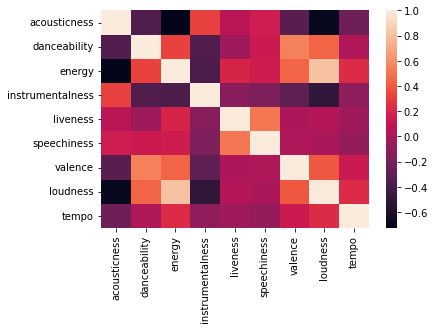

In [31]:
sns.heatmap(matrixcorrelation)

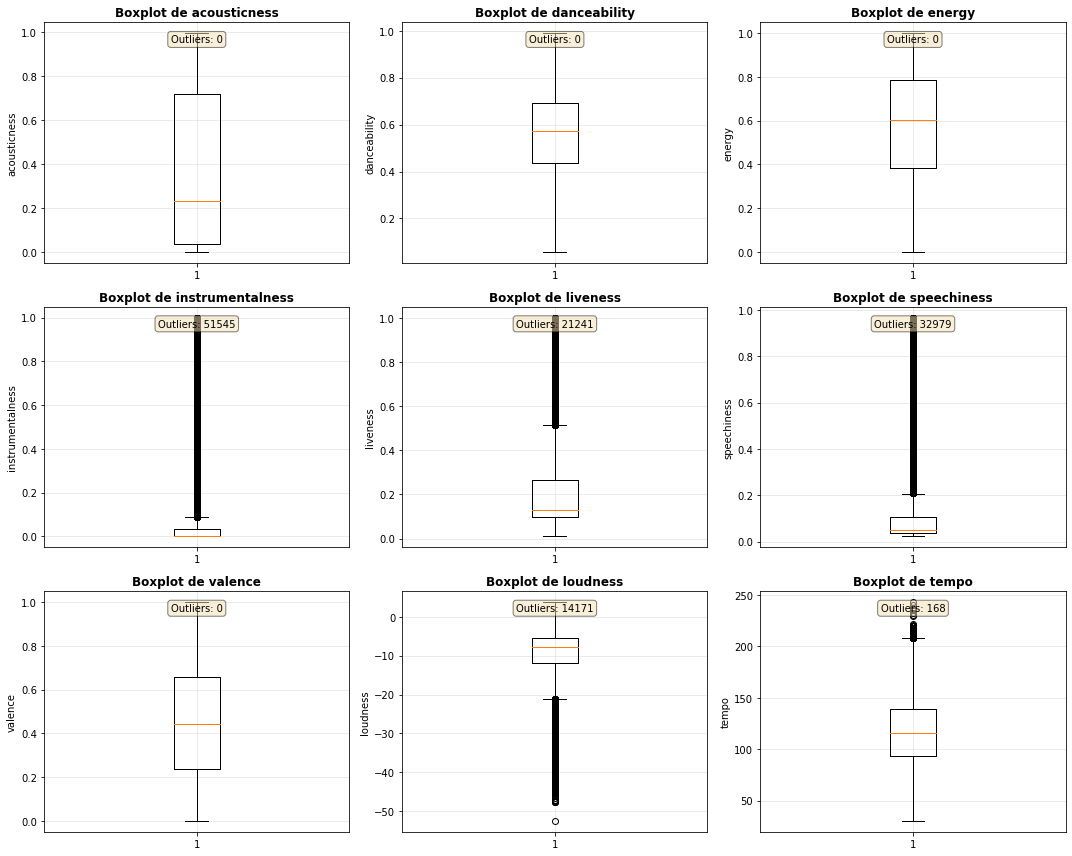

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(audio_features):
    axes[idx].boxplot(df[feature], vert=True)
    axes[idx].set_title(f'Boxplot de {feature}', fontweight='bold')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

    # Calculer nombre d'outliers (IQR method)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR))).sum()
    axes[idx].text(0.5, 0.95, f'Outliers: {outliers}',
                   transform=axes[idx].transAxes, ha='center', va='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()


In [33]:
genre_corr = df.groupby('genre')[audio_features].corr()
print(genre_corr)

                            acousticness  danceability    energy  \
genre                                                              
A Capella acousticness          1.000000     -0.587385 -0.773745   
          danceability         -0.587385      1.000000  0.640513   
          energy               -0.773745      0.640513  1.000000   
          instrumentalness      0.119052     -0.129068 -0.091685   
          liveness              0.027402      0.077920 -0.005375   
...                                  ...           ...       ...   
World     liveness             -0.266203     -0.007932  0.343728   
          speechiness          -0.030897      0.160767  0.175724   
          valence              -0.118320      0.618169  0.441736   
          loudness             -0.675695      0.374421  0.784944   
          tempo                -0.244738      0.044096  0.253595   

                            instrumentalness  liveness  speechiness   valence  \
genre                             

In [34]:


genre_means = df.groupby('genre')[audio_features].mean()
print("\nMoyennes des features par genre (Top 10) :")
print(genre_means)



Moyennes des features par genre (Top 10) :
                  acousticness  danceability    energy  instrumentalness  \
genre                                                                      
A Capella             0.829941      0.412252  0.250313          0.007491   
Alternative           0.162313      0.541898  0.711519          0.061303   
Anime                 0.286843      0.472090  0.665356          0.280592   
Blues                 0.327840      0.528232  0.606171          0.095175   
Children's Music      0.591781      0.697475  0.396880          0.143572   
Children’s Music      0.163175      0.541843  0.706616          0.054340   
Classical             0.868843      0.305958  0.177984          0.599425   
Comedy                0.793098      0.559038  0.676094          0.000574   
Country               0.270172      0.577038  0.636318          0.005610   
Dance                 0.152888      0.638191  0.698067          0.035449   
Electronic            0.119839      0.619542

<AxesSubplot:ylabel='genre'>

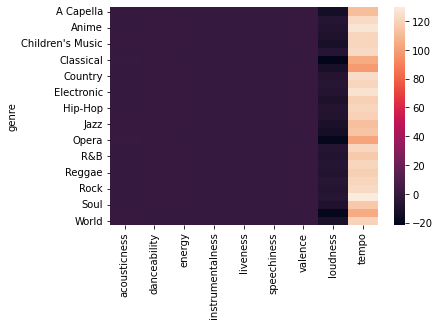

In [35]:
sns.heatmap(genre_means)

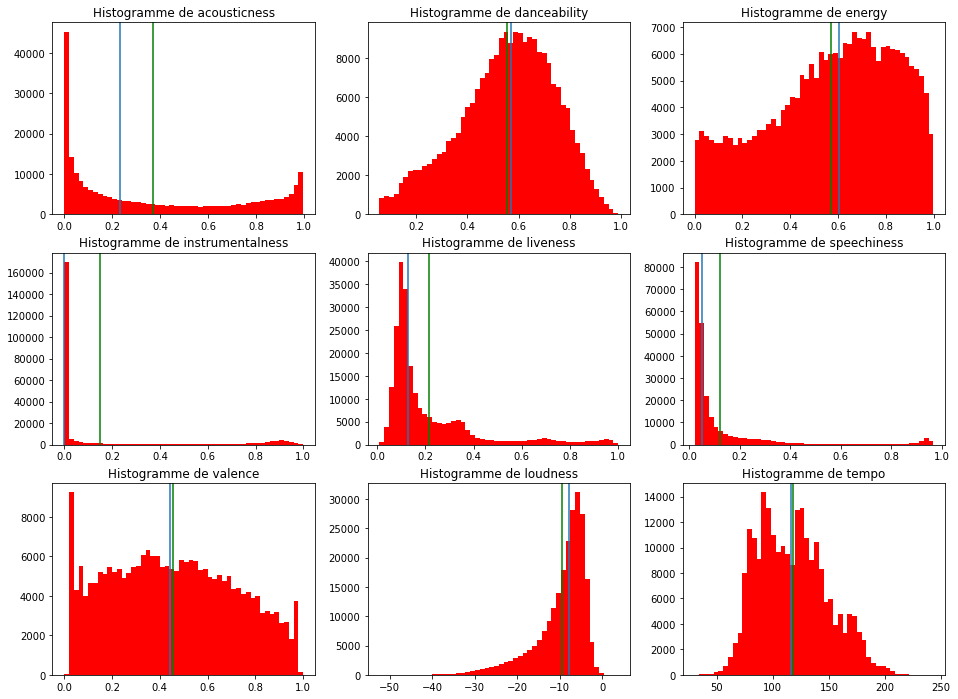

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(audio_features):
    # Histogramme
    axes[idx].hist(df[feature], bins=50, color='red')
    axes[idx].set_title(f'Histogramme de {feature}')
    mean_val = df[feature].mean()
    median_val = df[feature].median()

    axes[idx].axvline(mean_val,color="green")
    axes[idx].axvline(median_val)

In [52]:
low_energy = df[df['energy'] < 0.4]
medium_energy = df[(df['energy'] >= 0.4) & (df['energy'] < 0.7)]
high_energy = df[df['energy'] >= 0.7]
print("Low Energy Songs:")
print((len(low_energy))/len(df))
print("\nMedium Energy Songs:")
print((len(medium_energy))/len(df))
print("\nHigh Energy Songs:")
print((len(high_energy))/len(df))

Low Energy Songs:
0.26243420345901813

Medium Energy Songs:
0.3683746911590933

High Energy Songs:
0.3691911053818885


In [53]:
correlation_dance_energy = df['danceability'].corr(df['energy'])
print(f"Correlation entre Danceability et Energy: {correlation_dance_energy}")


Correlation entre Danceability et Energy: 0.32580699188301604


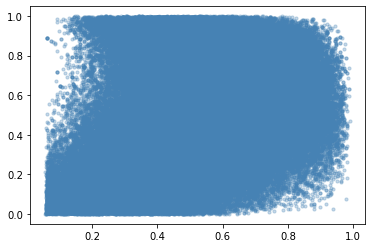

In [54]:
plt.scatter(df['danceability'], df['energy'], alpha=0.3, s=10, c='steelblue')

In [55]:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                  'liveness', 'loudness', 'speechiness', 'valence', 'tempo']

print("\n📊 Calcul du profil audio moyen par genre...")
genre_profiles = df.groupby('genre')[audio_features].mean()
print(f"   ✅ Profils calculés pour {len(genre_profiles)} genres")

print("\n📋 Exemples de profils :")
print(genre_profiles.head())

# Normaliser les profils pour le clustering
scaler = StandardScaler()
genre_profiles_scaled = scaler.fit_transform(genre_profiles)

# K-means pour regrouper les genres similaires
print("\n🔍 Recherche du nombre optimal de super-genres...")

inertias = []
silhouette_scores = []
K_range = range(3, 12)

from sklearn.metrics import silhouette_score

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(genre_profiles_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(genre_profiles_scaled, kmeans.labels_))
for k in inertias:
    print(k)
for p in  silhouette_scores:
    print(p)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"   ✅ Nombre optimal de super-genres : {optimal_k}")    


📊 Calcul du profil audio moyen par genre...
   ✅ Profils calculés pour 27 genres

📋 Exemples de profils :
                  acousticness  danceability    energy  instrumentalness  \
genre                                                                      
A Capella             0.829941      0.412252  0.250313          0.007491   
Alternative           0.162313      0.541898  0.711519          0.061303   
Anime                 0.286843      0.472090  0.665356          0.280592   
Blues                 0.327840      0.528232  0.606171          0.095175   
Children's Music      0.591781      0.697475  0.396880          0.143572   

                  liveness   loudness  speechiness   valence       tempo  
genre                                                                     
A Capella         0.136924 -13.660387     0.042414  0.328724  111.518950  
Alternative       0.196985  -6.540803     0.088783  0.449590  122.534485  
Anime             0.192391  -7.917802     0.065102  0.441682

In [56]:
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans_genres = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
genre_clusters = kmeans_genres.fit_predict(genre_profiles_scaled)

# Créer un dictionnaire genre → super-genre
genre_to_supergenre = {}
for genre, cluster in zip(genre_profiles.index, genre_clusters):
    genre_to_supergenre[genre] = f"SuperGenre_{cluster}"
print(genre_to_supergenre)    
df['super_genre'] = df['genre'].map(genre_to_supergenre)

{'A Capella': 'SuperGenre_0', 'Alternative': 'SuperGenre_1', 'Anime': 'SuperGenre_1', 'Blues': 'SuperGenre_1', "Children's Music": 'SuperGenre_1', 'Children’s Music': 'SuperGenre_1', 'Classical': 'SuperGenre_0', 'Comedy': 'SuperGenre_2', 'Country': 'SuperGenre_1', 'Dance': 'SuperGenre_1', 'Electronic': 'SuperGenre_1', 'Folk': 'SuperGenre_1', 'Hip-Hop': 'SuperGenre_1', 'Indie': 'SuperGenre_1', 'Jazz': 'SuperGenre_1', 'Movie': 'SuperGenre_1', 'Opera': 'SuperGenre_0', 'Pop': 'SuperGenre_1', 'R&B': 'SuperGenre_1', 'Rap': 'SuperGenre_1', 'Reggae': 'SuperGenre_1', 'Reggaeton': 'SuperGenre_1', 'Rock': 'SuperGenre_1', 'Ska': 'SuperGenre_1', 'Soul': 'SuperGenre_1', 'Soundtrack': 'SuperGenre_0', 'World': 'SuperGenre_1'}


In [57]:
from sklearn.decomposition import PCA
genre_profiles_scaled = scaler.fit_transform(genre_profiles)

# PCA sur les profils de genres
pca_genres = PCA(n_components=2)
genre_encoding_pca = pca_genres.fit_transform(genre_profiles_scaled)
print(pca_genres.explained_variance_ratio_[0])
print(pca_genres.explained_variance_ratio_[1])
# Créer un dictionnaire genre → encoding
genre_to_encoding = {}
genre_to_encoding1 = {}

for genre, encoding in zip(genre_profiles.index, genre_encoding_pca):
    genre_to_encoding[genre] = encoding[0]
    genre_to_encoding1[genre] = encoding[1]

print(genre_to_encoding)
print(genre_to_encoding1)

    

0.5812931923964584
0.25898818146083047
{'A Capella': 2.5680133616845926, 'Alternative': -1.3582773881160712, 'Anime': -0.5161034846042042, 'Blues': -0.7898297356897963, "Children's Music": -0.3515900165073505, 'Children’s Music': -1.3293382244848149, 'Classical': 5.5510305069147154, 'Comedy': 1.3165716729278767, 'Country': -1.411381092476402, 'Dance': -1.826561762769782, 'Electronic': -1.1775077091449384, 'Folk': 0.22292001200603664, 'Hip-Hop': -1.760369502978202, 'Indie': -0.4932806877809982, 'Jazz': 0.8866791461665078, 'Movie': 1.5531544741018894, 'Opera': 5.08674128639959, 'Pop': -1.5075799554622045, 'R&B': -0.8050791387616241, 'Rap': -1.7134148559719522, 'Reggae': -1.974058147620901, 'Reggaeton': -2.5783624553558857, 'Rock': -1.353851106659343, 'Ska': -2.5535463482104728, 'Soul': -0.38569984411343144, 'Soundtrack': 5.690497807969292, 'World': 1.0102231885378725}
{'A Capella': -0.4779551185679992, 'Alternative': -0.35499247702551934, 'Anime': -0.9002097166685029, 'Blues': -0.1725404

In [58]:
sorted_genres = sorted(genre_to_encoding.items(), key=lambda x: x[1], reverse=True)
print(sorted_genres)

[('Soundtrack', 5.690497807969292), ('Classical', 5.5510305069147154), ('Opera', 5.08674128639959), ('A Capella', 2.5680133616845926), ('Movie', 1.5531544741018894), ('Comedy', 1.3165716729278767), ('World', 1.0102231885378725), ('Jazz', 0.8866791461665078), ('Folk', 0.22292001200603664), ("Children's Music", -0.3515900165073505), ('Soul', -0.38569984411343144), ('Indie', -0.4932806877809982), ('Anime', -0.5161034846042042), ('Blues', -0.7898297356897963), ('R&B', -0.8050791387616241), ('Electronic', -1.1775077091449384), ('Children’s Music', -1.3293382244848149), ('Rock', -1.353851106659343), ('Alternative', -1.3582773881160712), ('Country', -1.411381092476402), ('Pop', -1.5075799554622045), ('Rap', -1.7134148559719522), ('Hip-Hop', -1.760369502978202), ('Dance', -1.826561762769782), ('Reggae', -1.974058147620901), ('Ska', -2.5535463482104728), ('Reggaeton', -2.5783624553558857)]


In [59]:
df['genre_target_encoding'] = df['genre'].map(genre_to_encoding)
df['genre_target_encoding1'] = df['genre'].map(genre_to_encoding1)



In [60]:
one_hot_super = pd.get_dummies(df['super_genre'], prefix='super_genre')
print(one_hot_super)

        super_genre_SuperGenre_0  super_genre_SuperGenre_1  \
0                              0                         1   
1                              0                         1   
2                              0                         1   
3                              0                         1   
4                              0                         1   
...                          ...                       ...   
232720                         0                         1   
232721                         0                         1   
232722                         0                         1   
232723                         0                         1   
232724                         0                         1   

        super_genre_SuperGenre_2  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0  
...                          ...  
232720    

In [61]:
df = pd.concat([df, one_hot_super], axis=1)


In [62]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  ... speechiness    tempo  \
0        99373   0.910             0.000  ...      0.0525  166.969   
1       137373   0.737             0.000  ...      0.0868  174.003   
2       170267   0.131             0.000  ...      0.0362   99.488   
3       152427   0.326             0.000  ...      0.0395  171.758   
4        82625   0.225             0.123  ...      0.0456  140.576   

   time_signature valence   super_genre  genre_target_encoding  \
0             4/4   0.814  SuperGenre_1               1.553154   
1             4/4   0.816  SuperGenre_1               1.553154   
2             5/4   0.368  SuperGenre_1               1.553154   
3             4/4   0.227  SuperGenre_1               1.553154   
4             4/4   0.390  SuperGenre_1               1.553154   

  genre_target_encoding1  super_genre_SuperGenre_0 super_genre_SuperGenre_1  \
0               0.250225                         0                        1   
1               0.250225                         0                        1   
2               0.250225                         0                        1   
3               0.250225                         0                        1   
4               0.250225                         0                        1   

   super_genre_SuperGenre_2  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  

[5 rows x 24 columns]

In [63]:
artist_profiles = df.groupby('artist_name')[audio_features].mean()
scaler_artist = StandardScaler()
artist_profiles_scaled = scaler_artist.fit_transform(artist_profiles)
pca_artist = PCA(n_components=3)
artist_encoding_pca = pca_artist.fit_transform(artist_profiles_scaled)

# Créer le dictionnaire artiste → encoding
artist_to_encoding = {}
artist_to_encoding1 = {}
artist_to_encoding2 = {}


for artist, encoding in zip(artist_profiles.index, artist_encoding_pca):
    artist_to_encoding[artist] = encoding[0]
    artist_to_encoding1[artist] = encoding[1]
    artist_to_encoding2[artist] = encoding[2]

df['artist_audio_encoding'] = df['artist_name'].map(artist_to_encoding)
df['artist_audio_encoding1'] = df['artist_name'].map(artist_to_encoding1)
df['artist_audio_encoding2'] = df['artist_name'].map(artist_to_encoding2)


df.head()    

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  ... valence   super_genre  \
0        99373   0.910             0.000  ...   0.814  SuperGenre_1   
1       137373   0.737             0.000  ...   0.816  SuperGenre_1   
2       170267   0.131             0.000  ...   0.368  SuperGenre_1   
3       152427   0.326             0.000  ...   0.227  SuperGenre_1   
4        82625   0.225             0.123  ...   0.390  SuperGenre_1   

   genre_target_encoding genre_target_encoding1  super_genre_SuperGenre_0  \
0               1.553154               0.250225                         0   
1               1.553154               0.250225                         0   
2               1.553154               0.250225                         0   
3               1.553154               0.250225                         0   
4               1.553154               0.250225                         0   

   super_genre_SuperGenre_1 super_genre_SuperGenre_2  artist_audio_encoding  \
0                         1                        0               0.805090   
1                         1                        0              -0.172559   
2                         1                        0               2.220505   
3                         1                        0               0.805090   
4                         1                        0               0.154913   

  artist_audio_encoding1  artist_audio_encoding2  
0               0.878785               -0.412004  
1               1.875087               -0.581992  
2              -0.061001               -0.538808  
3               0.878785               -0.412004  
4              -0.298338               -0.443312  

[5 rows x 27 columns]

In [64]:

# Étape 1 : Préparer les profils d'artistes
artist_counts = df['artist_name'].value_counts()
artist_profiles = df.groupby('artist_name')[audio_features].mean()

# Étape 2 : Normaliser les données
scaler_artist = StandardScaler()
artist_profiles_scaled = scaler_artist.fit_transform(artist_profiles)  # Nom corrigé

K_range = range(5, 20)
silhouette_scores = []

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(artist_profiles_scaled)  # Utiliser artist_profiles_scaled
    score = silhouette_score(artist_profiles_scaled, labels)  # Utiliser artist_profiles_scaled
    silhouette_scores.append(score)

# Optimal K
optimal_k_artists = K_range[np.argmax(silhouette_scores)]
print(f"✅ Nombre optimal de clusters : {optimal_k_artists}")

# Appliquer K-means optimal - PAS besoin de retransformer !
kmeans_artists = KMeans(n_clusters=optimal_k_artists, random_state=42, n_init=10)
artist_clusters = kmeans_artists.fit_predict(artist_profiles_scaled)  # Directement


✅ Nombre optimal de clusters : 6


In [65]:
artist_to_cluster = {}
for artist, cluster in zip(artist_profiles.index, artist_clusters):
    artist_to_cluster[artist] = f"ArtistCluster_{cluster}"

df['artist_cluster'] = df['artist_name'].map(artist_to_cluster)

In [66]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness  ...   super_genre  \
0        99373   0.910             0.000  ...  SuperGenre_1   
1       137373   0.737             0.000  ...  SuperGenre_1   
2       170267   0.131             0.000  ...  SuperGenre_1   
3       152427   0.326             0.000  ...  SuperGenre_1   
4        82625   0.225             0.123  ...  SuperGenre_1   

   genre_target_encoding  genre_target_encoding1 super_genre_SuperGenre_0  \
0               1.553154                0.250225                        0   
1               1.553154                0.250225                        0   
2               1.553154                0.250225                        0   
3               1.553154                0.250225                        0   
4               1.553154                0.250225                        0   

   super_genre_SuperGenre_1  super_genre_SuperGenre_2 artist_audio_encoding  \
0                         1                         0              0.805090   
1                         1                         0             -0.172559   
2                         1                         0              2.220505   
3                         1                         0              0.805090   
4                         1                         0              0.154913   

   artist_audio_encoding1 artist_audio_encoding2   artist_cluster  
0                0.878785              -0.412004  ArtistCluster_0  
1                1.875087              -0.581992  ArtistCluster_3  
2               -0.061001              -0.538808  ArtistCluster_0  
3                0.878785              -0.412004  ArtistCluster_0  
4               -0.298338              -0.443312  ArtistCluster_0  

[5 rows x 28 columns]

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


NameError: name 'artist_tsne' is not defined

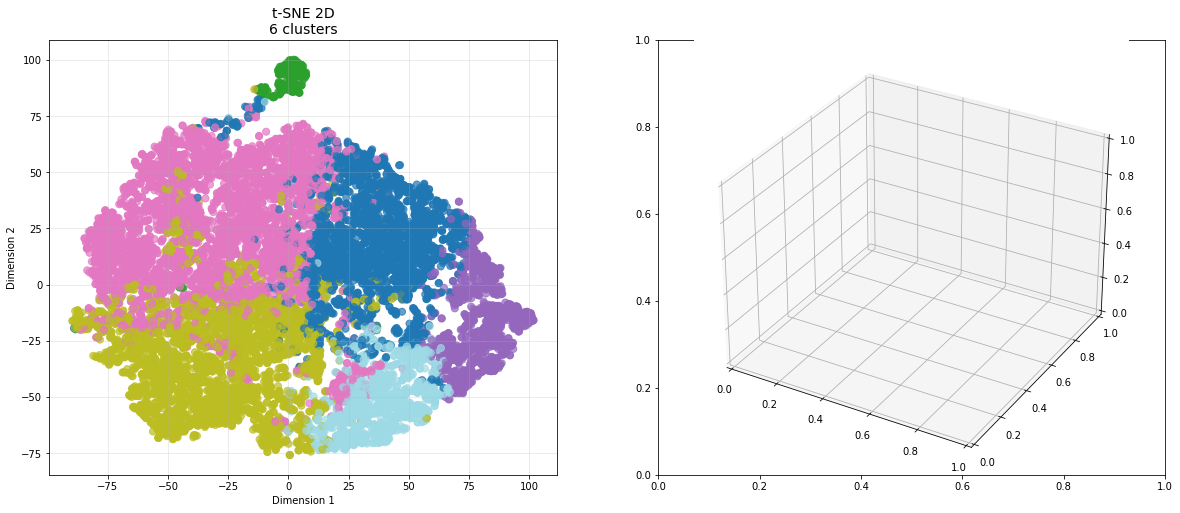

In [67]:
from sklearn.manifold import TSNE
# Comparer 2D et 3D côte à côte
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 2D
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, init='pca', learning_rate='auto')
artist_tsne_2d = tsne_2d.fit_transform(artist_profiles_scaled)

scatter2d = axes[0].scatter(
    artist_tsne_2d[:, 0],
    artist_tsne_2d[:, 1],
    c=artist_clusters,
    cmap='tab20',
    alpha=0.7,
    s=50
)
axes[0].set_title(f't-SNE 2D\n{optimal_k_artists} clusters', fontsize=14)
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].grid(True, alpha=0.3)

# 3D
ax3d = fig.add_subplot(122, projection='3d')
scatter3d = ax3d.scatter(
    artist_tsne[:, 0],
    artist_tsne[:, 1],
    artist_tsne[:, 2],
    c=artist_clusters,
    cmap='tab20',
    alpha=0.7,
    s=50
)
ax3d.set_title(f't-SNE 3D\n{optimal_k_artists} clusters', fontsize=14)
ax3d.set_xlabel('Dimension 1')
ax3d.set_ylabel('Dimension 2')
ax3d.set_zlabel('Dimension 3')
ax3d.grid(True, alpha=0.3)

# Barre de couleur pour les deux
cbar = fig.colorbar(scatter2d, ax=[axes[0], ax3d], pad=0.1)
cbar.set_label('Cluster ID')

plt.tight_layout()
plt.show()

In [68]:
binary_cols = [col for col in df.columns 
               if col.startswith('super_genre_SuperGenre_') 
               or col.startswith('artist_cluster_ArtistCluster_')]

# Colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Colonnes à normaliser = numériques - binaires
cols_to_normalize = [col for col in numeric_cols 
                     if col not in binary_cols]
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV   -2.261007      0.683376     -0.890935   
1  0BjC1NfoEOOusryehmNudP   -2.206031     -0.345467      0.191994   
2  0CoSDzoNIKCRs124s9uTVy   -2.096080      1.644570      0.585296   
3  0Gc6TVm52BwZD07Ki6tIvf   -2.261007      0.942701     -1.693703   
4  0IuslXpMROHdEPvSl1fTQK   -2.041104      1.638932     -1.203422   

   duration_ms    energy  instrumentalness  ...   super_genre  \
0    -1.141368  1.286908         -0.489819  ...  SuperGenre_1   
1    -0.821867  0.630249         -0.489819  ...  SuperGenre_1   
2    -0.545298 -1.669954         -0.489819  ...  SuperGenre_1   
3    -0.695295 -0.929789         -0.489819  ...  SuperGenre_1   
4    -1.282184 -1.313157         -0.083566  ...  SuperGenre_1   

   genre_target_encoding  genre_target_encoding1 super_genre_SuperGenre_0  \
0               0.719536                 0.13452                        0   
1               0.719536                 0.13452                        0   
2               0.719536                 0.13452                        0   
3               0.719536                 0.13452                        0   
4               0.719536                 0.13452                        0   

   super_genre_SuperGenre_1  super_genre_SuperGenre_2 artist_audio_encoding  \
0                         1                         0              0.361713   
1                         1                         0             -0.141740   
2                         1                         0              1.090598   
3                         1                         0              0.361713   
4                         1                         0              0.026896   

   artist_audio_encoding1 artist_audio_encoding2   artist_cluster  
0                0.383266              -0.684136  ArtistCluster_0  
1                1.006398              -0.883575  ArtistCluster_3  
2               -0.204519              -0.832909  ArtistCluster_0  
3                0.383266              -0.684136  ArtistCluster_0  
4               -0.352960              -0.720869  ArtistCluster_0  

[5 rows x 28 columns]

🎨 ÉTAPE 3: PCA - RÉDUCTION DE DIMENSIONNALITÉ

📊 Variance expliquée par composante:
   PC1: 34.59% (Cumulé: 34.59%)
   PC2: 16.22% (Cumulé: 50.81%)
   PC3: 11.67% (Cumulé: 62.48%)


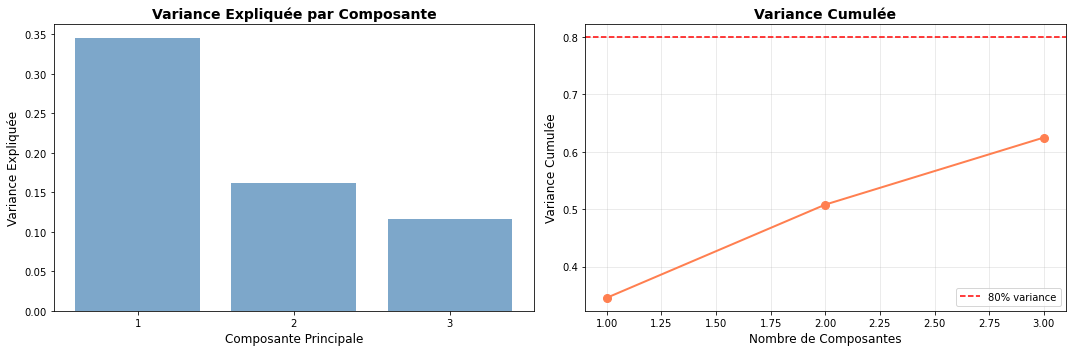


🔍 Interprétation des Composantes:
                    PC1    PC2    PC3
acousticness      0.420  0.226 -0.226
danceability     -0.342  0.034 -0.462
energy           -0.463  0.049  0.263
instrumentalness  0.333 -0.173  0.087
liveness         -0.054  0.642  0.228
loudness         -0.475 -0.062  0.162
speechiness      -0.053  0.676 -0.010
valence          -0.346 -0.015 -0.380
tempo            -0.162 -0.206  0.317
duration_ms       0.066 -0.002  0.579


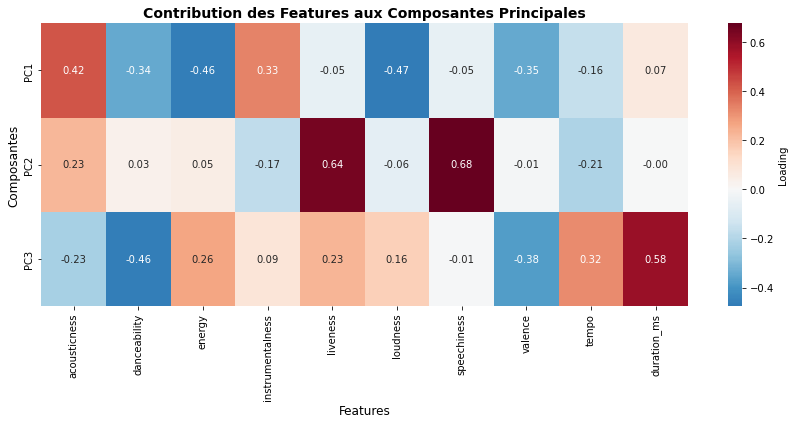

{'X_pca': array([[-1.60807993,  0.0194336 ,  0.23775271],
       [-1.78589878, -0.72321733, -0.27598393],
       [ 1.67220836, -0.10314219, -1.73974331],
       ...,
       [ 0.38780729,  0.28957177, -1.74419198],
       [-1.06613825,  0.64103794, -0.40909457],
       [-0.80892324, -0.8372806 , -0.19289469]]), 'pca_model': PCA(n_components=3), 'scaler': StandardScaler(), 'variance_ratio': array([0.34589712, 0.16220454, 0.11671687]), 'cumulative_variance': array([0.34589712, 0.50810167, 0.62481853]), 'components':                        PC1       PC2       PC3
acousticness      0.420307  0.226109 -0.225533
danceability     -0.341597  0.034107 -0.462127
energy           -0.462910  0.048602  0.262950
instrumentalness  0.332838 -0.173394  0.086960
liveness         -0.054427  0.641718  0.228386
loudness         -0.474662 -0.062268  0.161852
speechiness      -0.053470  0.675961 -0.009695
valence          -0.346220 -0.014766 -0.379543
tempo            -0.161860 -0.206058  0.317325
duration_ms

In [69]:
    """
    Réduction de dimensionnalité avec PCA
    
    Analogie: Résumer un livre en quelques mots-clés
    - De 9 caractéristiques → 2-3 super-caractéristiques
    """
    print("🎨 ÉTAPE 3: PCA - RÉDUCTION DE DIMENSIONNALITÉ")
    print("=" * 60)
    features = [
    'acousticness',      # 🎸 Mesure acoustique
    'danceability',      # 🕺 Aptitude à danser
    'energy',            # ⚡ Intensité
    'instrumentalness',  # 🎹 Contenu instrumental
    'liveness',          # 🎤 Enregistrement live
    'loudness',          # 🔊 Volume
    'speechiness',       # 🗣️ Contenu parlé
    'valence',           # 😊 Positivité émotionnelle
    'tempo',             # 🥁 BPM
    'duration_ms'        # ⏱️ Durée (optionnel)
]
    n_components=3
    # Standardisation (obligatoire pour PCA)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])
    
    # PCA avec n composantes
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Variance expliquée
    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratio)
    
    print(f"\n📊 Variance expliquée par composante:")
    for i, var in enumerate(variance_ratio):
        print(f"   PC{i+1}: {var:.2%} (Cumulé: {cumulative_variance[i]:.2%})")
    
    # Visualisation de la variance expliquée
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Graphique 1: Variance par composante
    axes[0].bar(range(1, n_components+1), variance_ratio, alpha=0.7, color='steelblue')
    axes[0].set_xlabel('Composante Principale', fontsize=12)
    axes[0].set_ylabel('Variance Expliquée', fontsize=12)
    axes[0].set_title('Variance Expliquée par Composante', fontsize=14, fontweight='bold')
    axes[0].set_xticks(range(1, n_components+1))
    
    # Graphique 2: Variance cumulée
    axes[1].plot(range(1, n_components+1), cumulative_variance, 
                 marker='o', linewidth=2, markersize=8, color='coral')
    axes[1].axhline(y=0.8, color='red', linestyle='--', label='80% variance')
    axes[1].set_xlabel('Nombre de Composantes', fontsize=12)
    axes[1].set_ylabel('Variance Cumulée', fontsize=12)
    axes[1].set_title('Variance Cumulée', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('pca_variance_explained.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Interprétation des composantes
    print(f"\n🔍 Interprétation des Composantes:")
    components_df = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=features
    )
    print(components_df.round(3))
    
    # Visualisation des loadings (contribution des features)
    plt.figure(figsize=(12, 6))
    sns.heatmap(components_df.T, annot=True, fmt='.2f', cmap='RdBu_r', 
                center=0, cbar_kws={'label': 'Loading'})
    plt.title('Contribution des Features aux Composantes Principales', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Composantes', fontsize=12)
    plt.tight_layout()
    plt.savefig('pca_loadings.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    k={ 'X_pca': X_pca,
        'pca_model': pca,
        'scaler': scaler,
        'variance_ratio': variance_ratio,
        'cumulative_variance': cumulative_variance,
        'components': components_df}
        
    print(k)


🔍 MÉTHODE 1: ISOLATION FOREST

📊 Résultats:
   Total chansons: 232725
   ✅ Normales: 221088 (95.0%)
   ⚠️ Outliers: 11637 (5.0%)


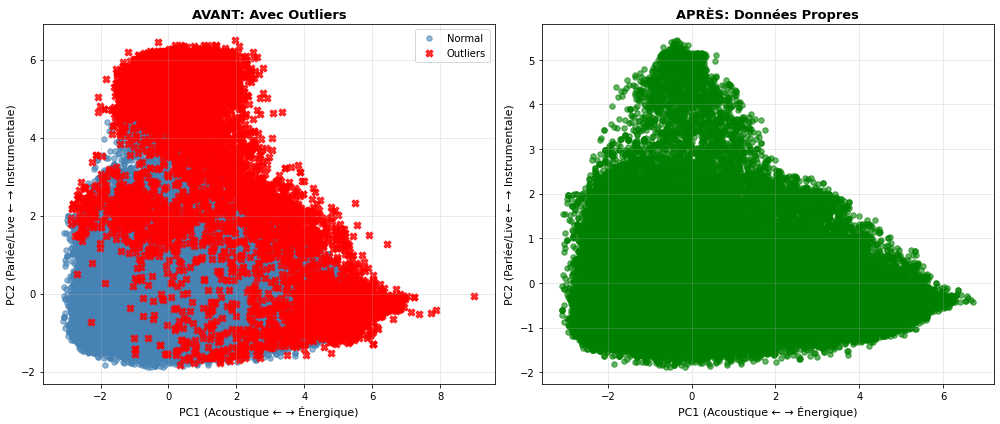

{'outlier_labels': array([1, 1, 1, ..., 1, 1, 1]), 'mask_normal': array([ True,  True,  True, ...,  True,  True,  True]), 'mask_outliers': array([False, False, False, ..., False, False, False]), 'X_clean': array([[-1.60807993,  0.0194336 ,  0.23775271],
       [-1.78589878, -0.72321733, -0.27598393],
       [ 1.67220836, -0.10314219, -1.73974331],
       ...,
       [ 0.38780729,  0.28957177, -1.74419198],
       [-1.06613825,  0.64103794, -0.40909457],
       [-0.80892324, -0.8372806 , -0.19289469]]), 'X_outliers': array([[ 1.74748584,  5.15015653, 10.40280966],
       [ 0.21080146,  3.06242395, -2.46979002],
       [ 1.86385441,  4.89771613, -2.79262565],
       ...,
       [ 0.11942281,  1.94166072,  3.39409198],
       [ 1.36439766,  4.00960551, -1.96431996],
       [-2.23665184,  1.71798857,  2.00480172]]), 'n_outliers': 11637, 'pct_outliers': 5.000322268772156}


In [70]:

    """
    Détection d'outliers avec Isolation Forest
    
    contamination : pourcentage d'outliers attendus (ex: 0.05 = 5%)
    
    Retourne:
        - outlier_labels : 1 = normal, -1 = outlier
        - X_clean : données sans outliers
        - X_outliers : outliers isolés
        
    """
    from sklearn.ensemble import IsolationForest

    print("\n" + "="*60)
    print("🔍 MÉTHODE 1: ISOLATION FOREST")
    print("="*60)
    contamination=0.05
    # Modèle Isolation Forest
    iso_forest = IsolationForest(
        contamination=contamination,
        random_state=42,
        n_estimators=100
    )
    
    # Prédiction: 1 = normal, -1 = outlier
    outlier_labels = iso_forest.fit_predict(X_pca)
    
    # Statistiques
    n_outliers = np.sum(outlier_labels == -1)
    n_normal = np.sum(outlier_labels == 1)
    pct_outliers = (n_outliers / len(outlier_labels)) * 100
    
    print(f"\n📊 Résultats:")
    print(f"   Total chansons: {len(outlier_labels)}")
    print(f"   ✅ Normales: {n_normal} ({100-pct_outliers:.1f}%)")
    print(f"   ⚠️ Outliers: {n_outliers} ({pct_outliers:.1f}%)")
    
    # Séparer les données
    mask_normal = outlier_labels == 1
    mask_outliers = outlier_labels == -1
    
    X_clean = X_pca[mask_normal]
    X_outliers = X_pca[mask_outliers]
    
    # Visualisation 2D (PC1 vs PC2)
    plt.figure(figsize=(14, 6))
    
    # Subplot 1: Avec outliers
    plt.subplot(1, 2, 1)
    plt.scatter(X_pca[mask_normal, 0], X_pca[mask_normal, 1], 
                c='steelblue', alpha=0.6, s=30, label='Normal')
    plt.scatter(X_pca[mask_outliers, 0], X_pca[mask_outliers, 1], 
                c='red', alpha=0.8, s=50, marker='X', label='Outliers')
    plt.xlabel('PC1 (Acoustique ← → Énergique)', fontsize=11)
    plt.ylabel('PC2 (Parlée/Live ← → Instrumentale)', fontsize=11)
    plt.title('AVANT: Avec Outliers', fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Subplot 2: Sans outliers
    plt.subplot(1, 2, 2)
    plt.scatter(X_clean[:, 0], X_clean[:, 1], 
                c='green', alpha=0.6, s=30)
    plt.xlabel('PC1 (Acoustique ← → Énergique)', fontsize=11)
    plt.ylabel('PC2 (Parlée/Live ← → Instrumentale)', fontsize=11)
    plt.title('APRÈS: Données Propres', fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('1_outliers_isolation_forest.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    ko={
        'outlier_labels': outlier_labels,
        'mask_normal': mask_normal,
        'mask_outliers': mask_outliers,
        'X_clean': X_clean,
        'X_outliers': X_outliers,
        'n_outliers': n_outliers,
        'pct_outliers': pct_outliers
    }
print(ko)

In [18]:
df.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV   -2.261007      0.683376     -0.890935   
1  0BjC1NfoEOOusryehmNudP   -2.206031     -0.345467      0.191994   
2  0CoSDzoNIKCRs124s9uTVy   -2.096080      1.644570      0.585296   
3  0Gc6TVm52BwZD07Ki6tIvf   -2.261007      0.942701     -1.693703   
4  0IuslXpMROHdEPvSl1fTQK   -2.041104      1.638932     -1.203422   

   duration_ms    energy  instrumentalness  ...   super_genre  \
0    -1.141368  1.286908         -0.489819  ...  SuperGenre_1   
1    -0.821867  0.630249         -0.489819  ...  SuperGenre_1   
2    -0.545298 -1.669954         -0.489819  ...  SuperGenre_1   
3    -0.695295 -0.929789         -0.489819  ...  SuperGenre_1   
4    -1.282184 -1.313157         -0.083566  ...  SuperGenre_1   

   genre_target_encoding  genre_target_encoding1 super_genre_SuperGenre_0  \
0               0.719536                 0.13452                        0   
1               0.719536                 0.13452                        0   
2               0.719536                 0.13452                        0   
3               0.719536                 0.13452                        0   
4               0.719536                 0.13452                        0   

   super_genre_SuperGenre_1  super_genre_SuperGenre_2 artist_audio_encoding  \
0                         1                         0              0.361713   
1                         1                         0             -0.141740   
2                         1                         0              1.090598   
3                         1                         0              0.361713   
4                         1                         0              0.026896   

   artist_audio_encoding1 artist_audio_encoding2   artist_cluster  
0                0.383266              -0.684136  ArtistCluster_0  
1                1.006398              -0.883575  ArtistCluster_3  
2               -0.204519              -0.832909  ArtistCluster_0  
3                0.383266              -0.684136  ArtistCluster_0  
4               -0.352960              -0.720869  ArtistCluster_0  

[5 rows x 28 columns]

In [ ]:

    """
    Appliquer K-Means UNIQUEMENT sur les données propres
    """
    from sklearn.metrics import davies_bouldin_score
    k_range=range(3, 11)
    print("\n" + "="*60)
    print("🗂️ K-MEANS SUR DONNÉES PROPRES")
    print("="*60)
    
    # Trouver K optimal
    print("\n🔍 Recherche du K optimal...")
    inertias = []
    silhouette_scores = []
    davies_bouldin_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_clean)
        
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_clean, labels))
        davies_bouldin_scores.append(davies_bouldin_score(X_clean, labels))
    
    # Visualisation métriques
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Nombre de Clusters (K)', fontsize=12)
    axes[0].set_ylabel('Inertie', fontsize=12)
    axes[0].set_title('Méthode du Coude', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(k_range, silhouette_scores, marker='s', 
                 linewidth=2, markersize=8, color='green')
    axes[1].set_xlabel('Nombre de Clusters (K)', fontsize=12)
    axes[1].set_ylabel('Silhouette Score', fontsize=12)
    axes[1].set_title('Silhouette Score (↑ meilleur)', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    axes[2].plot(k_range, davies_bouldin_scores, marker='^', 
                 linewidth=2, markersize=8, color='red')
    axes[2].set_xlabel('Nombre de Clusters (K)', fontsize=12)
    axes[2].set_ylabel('Davies-Bouldin Score', fontsize=12)
    axes[2].set_title('Davies-Bouldin Score (↓ meilleur)', fontsize=14, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('3_kmeans_optimal_k_clean.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # K optimal
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"\n✅ K optimal: {optimal_k}")
    print(f"   Silhouette Score: {max(silhouette_scores):.3f}")
    
    # K-Means final
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    labels_clean = kmeans_final.fit_predict(X_clean)
    
    # Visualisation clusters
    plt.figure(figsize=(14, 10))
    
    colors = plt.cm.tab10(np.linspace(0, 1, optimal_k))
    
    for i in range(optimal_k):
        mask = labels_clean == i
        plt.scatter(X_clean[mask, 0], X_clean[mask, 1], 
                   c=[colors[i]], label=f'Cluster {i}',
                   alpha=0.6, s=50, edgecolors='w', linewidth=0.5)
    
    # Centroïdes
    centroids = kmeans_final.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], 
               c='black', s=300, marker='*', 
               edgecolors='yellow', linewidth=2, label='Centroïdes')
    
    plt.xlabel('PC1 (Acoustique ← → Énergique)', fontsize=12)
    plt.ylabel('PC2 (Parlée/Live ← → Instrumentale)', fontsize=12)
    plt.title(f'K-Means (K={optimal_k}) sur Données PROPRES', 
              fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('4_kmeans_final_clean.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Distribution des clusters
    unique, counts = np.unique(labels_clean, return_counts=True)
    print(f"\n📈 Distribution des Clusters:")
    for cluster_id, count in zip(unique, counts):
        percentage = (count / len(labels_clean)) * 100
        print(f"   Cluster {cluster_id}: {count} chansons ({percentage:.1f}%)")
    
    db= {
        'kmeans_model': kmeans_final,
        'labels_clean': labels_clean,
        'optimal_k': optimal_k,
        'centroids': centroids,
        'silhouette': max(silhouette_scores),
        'inertias': inertias,
        'silhouette_scores': silhouette_scores
    }
    print(db)
   


🗂️ K-MEANS SUR DONNÉES PROPRES

🔍 Recherche du K optimal...


In [74]:
from sklearn.metrics import davies_bouldin_score
    # Trouver K optimal
print("\n🔍 Recherche du K optimal...")

kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
labels_clean = kmeans.fit_predict(X_clean)  # Correction: changer 'labels' en 'labels_clean'

# K optimal
optimal_k = 6
for i in range(optimal_k):
    mask = labels_clean == i  # Utilisation de labels_clean définie ci-dessus
   
# Centroïdes
centroids = kmeans.cluster_centers_

db = {
    'kmeans_model': kmeans,
    'labels_clean': labels_clean,  # labels_clean est maintenant défini
    'optimal_k': 6,
}
print(db)
    


🔍 Recherche du K optimal...
{'kmeans_model': KMeans(n_clusters=6, random_state=42), 'labels_clean': array([4, 4, 3, ..., 1, 4, 4]), 'optimal_k': 6}


In [76]:
def categorize_cluster(cluster_data, normal_means):
    """Détermine le nom de catégorie basé sur les caractéristiques"""
    features_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo']
    means = cluster_data[features_clustering].mean()
    
    # Calculer les écarts par rapport à la normale (en %)
    diffs = {}
    for feat in features_clustering:
        if normal_means[feat] != 0:
            diffs[feat] = ((means[feat] - normal_means[feat]) / normal_means[feat]) * 100
        else:
            diffs[feat] = 0
    
    # Règles de catégorisation
    conditions = {
        'acousticness': means['acousticness'],
        'instrumentalness': means['instrumentalness'],
        'energy': means['energy'],
        'speechiness': means['speechiness'],
        'danceability': means['danceability'],
        'valence': means['valence'],
        'liveness': means['liveness']
    }
    
    # Logique de nommage
    if conditions['instrumentalness'] > 0.5:
        if conditions['energy'] < 0.3:
            category = "🎻 Instrumentales Calmes"
            profile = "Musique instrumentale douce, sans paroles"
        else:
            category = "🎸 Instrumentales Énergiques"
            profile = "Musique instrumentale dynamique (rock/metal instrumental)"
    
    elif conditions['speechiness'] > 0.33:
        if conditions['energy'] > 0.6:
            category = "🎤 Rap/Hip-Hop Intense"
            profile = "Beaucoup de paroles, énergie élevée"
        else:
            category = "🗣️ Spoken Word/Podcast"
            profile = "Contenu principalement parlé"
    
    elif conditions['acousticness'] > 0.7:
        category = "🪕 Ultra-Acoustiques"
        profile = "Très acoustique, instruments naturels"
    
    elif conditions['liveness'] > 0.6:
        category = "🎪 Performances Live"
        profile = "Enregistrements live avec ambiance publique"
    
    elif conditions['energy'] < 0.2:
        if conditions['valence'] < 0.3:
            category = "😔 Ambient/Triste"
            profile = "Très calme, atmosphère mélancolique"
        else:
            category = "🧘 Méditation/Relaxation"
            profile = "Très calme, apaisant"
    
    elif conditions['energy'] > 0.9 and conditions['valence'] > 0.7:
        category = "⚡ Hyper-Énergiques Joyeux"
        profile = "Extrêmement énergique et positif"
    
    elif conditions['valence'] < 0.2:
        category = "🌧️ Mélancoliques"
        profile = "Humeur très négative/triste"
    
    else:
        # Features les plus extrêmes
        top_extreme = sorted(diffs.items(), key=lambda x: abs(x[1]), reverse=True)[:2]
        category = f"🎵 Atypiques ({top_extreme[0][0]})"
        profile = f"Profil non-standard dominé par {top_extreme[0][0]}"
    
    return category, profile, diffs


🏷️ CATÉGORISATION DES CLUSTERS

📊 Moyennes globales du dataset:
danceability       -2.637278e-15
energy              2.135201e-15
loudness           -2.351302e-17
speechiness        -7.926363e-16
acousticness       -3.416839e-16
instrumentalness   -8.930502e-14
liveness            1.063045e-15
valence             3.596597e-16
tempo              -2.725601e-16
dtype: float64

CLUSTER 0

🎯 Catégorie: 🎻 Instrumentales Calmes
📝 Profil: Musique instrumentale douce, sans paroles
📈 Taille: 22824 chansons (9.8%)

🔍 Écarts par rapport à la normale:
   loudness            : ↑ 8356332396681631744.0%
   acousticness        : ↓ 434263389784348352.0%
   valence             : ↓ 353518182191657216.0%
   tempo               : ↑ 204101895224871104.0%
   energy              : ↓ 78776799585570464.0%

📌 Moyennes du cluster:
   danceability        : -1.555
   energy              : -1.682
   loudness            : -1.965
   speechiness         : -0.409
   acousticness        : 1.484
   instrumentalness    : 1

C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\2446077850.py:101: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\2446077850.py:101: UserWarning: Glyph 129496 (\N{PERSON IN LOTUS POSITION}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\2446077850.py:101: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\2446077850.py:101: UserWarning: Glyph 129685 (\N{BANJO}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\2446077850.py:101: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\2446077850.py:101: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Lo

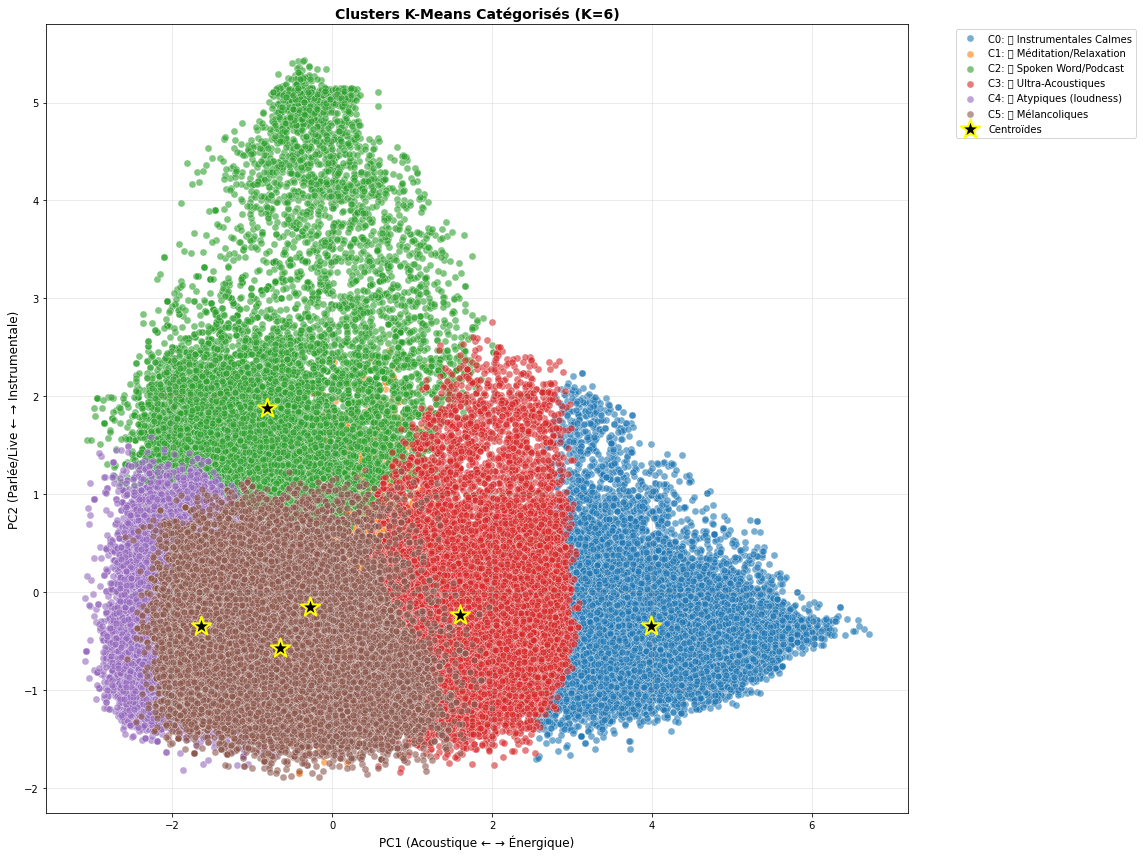


📋 RÉSUMÉ DES CATÉGORIES

🎻 Instrumentales Calmes
  ├─ Cluster ID: 0
  ├─ Taille: 22824 chansons
  └─ Profil: Musique instrumentale douce, sans paroles

🧘 Méditation/Relaxation
  ├─ Cluster ID: 1
  ├─ Taille: 40813 chansons
  └─ Profil: Très calme, apaisant

🗣️ Spoken Word/Podcast
  ├─ Cluster ID: 2
  ├─ Taille: 14292 chansons
  └─ Profil: Contenu principalement parlé

🪕 Ultra-Acoustiques
  ├─ Cluster ID: 3
  ├─ Taille: 32348 chansons
  └─ Profil: Très acoustique, instruments naturels

🎵 Atypiques (loudness)
  ├─ Cluster ID: 4
  ├─ Taille: 63129 chansons
  └─ Profil: Profil non-standard dominé par loudness

🌧️ Mélancoliques
  ├─ Cluster ID: 5
  ├─ Taille: 47682 chansons
  └─ Profil: Humeur très négative/triste

✅ Dataset avec clusters et catégories sauvegardé!


In [77]:
# Après avoir obtenu les clusters K-Means
print("\n" + "="*60)
print("🏷️ CATÉGORISATION DES CLUSTERS")
print("="*60)
df_clean = df[features_clustering + ['genre', 'artist_name','track_name','super_genre',
    'genre_target_encoding',
    'genre_target_encoding1',
    'super_genre_SuperGenre_0',
    'super_genre_SuperGenre_1',
    'super_genre_SuperGenre_2',
    
    # Encodages d'artiste
    'artist_audio_encoding',
    'artist_audio_encoding1',
    'artist_audio_encoding2',
    'artist_cluster']].copy()

# 1. Calculer les moyennes "normales" (sur tout le dataset)
features_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo']

normal_means = df_clean[features_clustering].mean()
print("\n📊 Moyennes globales du dataset:")
print(normal_means)

# 2. Ajouter les labels de clusters au DataFrame
df_no_na = df_clean[features_clustering].dropna()
normal_indices = df_no_na.index[ko['mask_normal']]

  # Créer un DataFrame pour le clustering
df_clustered = df_clean.loc[normal_indices].copy()
df_clustered['cluster'] = labels_clean
# 3. Analyser et catégoriser chaque cluster
cluster_info = {}

for cluster_id in range(optimal_k):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print('='*60)
    
    # Extraire les données du cluster
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    
    # Obtenir la catégorie
    category, profile, diffs = categorize_cluster(cluster_data, normal_means)
    
    # Afficher les informations
    print(f"\n🎯 Catégorie: {category}")
    print(f"📝 Profil: {profile}")
    print(f"📈 Taille: {len(cluster_data)} chansons ({len(cluster_data)/len(df_clean)*100:.1f}%)")
    
    print(f"\n🔍 Écarts par rapport à la normale:")
    for feat, diff in sorted(diffs.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
        symbol = "↑" if diff > 0 else "↓"
        print(f"   {feat:20s}: {symbol} {abs(diff):6.1f}%")
    
    print(f"\n📌 Moyennes du cluster:")
    cluster_means = cluster_data[features_clustering].mean()
    for feat in features_clustering:
        print(f"   {feat:20s}: {cluster_means[feat]:.3f}")
    
    # Stocker les infos
    cluster_info[cluster_id] = {
        'category': category,
        'profile': profile,
        'size': len(cluster_data),
        'means': cluster_means.to_dict(),
        'diffs': diffs
    }

# 4. Ajouter les catégories au DataFrame
df_clustered['category'] = df_clustered['cluster'].map(
    lambda x: cluster_info[x]['category']
)

# 5. Visualisation avec les noms de catégories
plt.figure(figsize=(16, 12))

for cluster_id in range(optimal_k):
    mask = labels_clean == cluster_id
    category_name = cluster_info[cluster_id]['category']
    
    plt.scatter(X_clean[mask, 0], X_clean[mask, 1], 
               label=f'C{cluster_id}: {category_name}',
               alpha=0.6, s=50, edgecolors='w', linewidth=0.5)

# Centroïdes
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='black', s=400, marker='*', 
           edgecolors='yellow', linewidth=2, 
           label='Centroïdes', zorder=10)

plt.xlabel('PC1 (Acoustique ← → Énergique)', fontsize=12)
plt.ylabel('PC2 (Parlée/Live ← → Instrumentale)', fontsize=12)
plt.title(f'Clusters K-Means Catégorisés (K={optimal_k})', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('5_kmeans_categorized.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Résumé final
print("\n" + "="*60)
print("📋 RÉSUMÉ DES CATÉGORIES")
print("="*60)

for cluster_id in sorted(cluster_info.keys()):
    info = cluster_info[cluster_id]
    print(f"\n{info['category']}")
    print(f"  ├─ Cluster ID: {cluster_id}")
    print(f"  ├─ Taille: {info['size']} chansons")
    print(f"  └─ Profil: {info['profile']}")

# 7. Sauvegarder les résultats
df_clean.to_csv('spotify_clustered_categorized.csv', index=False)
print("\n✅ Dataset avec clusters et catégories sauvegardé!")

# 8. Mettre à jour le dictionnaire db
db.update({
    'cluster_info': cluster_info,
    'df_clustered': df_clustered,
    'normal_means': normal_means
})

In [49]:
df1=df_clustered.copy()
df1.head()

danceability    energy  loudness  speechiness  acousticness  \
0     -0.890935  1.286908  1.290703    -0.367970      0.683376   
1      0.191994  0.630249  0.668683    -0.183082     -0.345467   
2      0.585296 -1.669954 -0.718402    -0.455832      1.644570   
3     -1.693703 -0.929789 -0.434817    -0.438044      0.942701   
4     -1.203422 -1.313157 -1.930601    -0.405163      1.638932   

   instrumentalness  liveness   valence     tempo  genre  ...  \
0         -0.489819  0.660661  1.380744  1.595607  Movie  ...   
1         -0.489819 -0.322835  1.388435  1.823253  Movie  ...   
2         -0.489819 -0.564927 -0.334212 -0.588326  Movie  ...   
3         -0.489819 -0.587623 -0.876384  1.750597  Movie  ...   
4         -0.083566 -0.065613 -0.249618  0.741433  Movie  ...   

  genre_target_encoding1 super_genre_SuperGenre_0 super_genre_SuperGenre_1  \
0                0.13452                        0                        1   
1                0.13452                        0                        1   
2                0.13452                        0                        1   
3                0.13452                        0                        1   
4                0.13452                        0                        1   

   super_genre_SuperGenre_2  artist_audio_encoding  artist_audio_encoding1  \
0                         0               0.361713                0.383266   
1                         0              -0.141740                1.006398   
2                         0               1.090598               -0.204519   
3                         0               0.361713                0.383266   
4                         0               0.026896               -0.352960   

   artist_audio_encoding2   artist_cluster  cluster                 category  
0               -0.684136  ArtistCluster_0        0   🎵 Atypiques (loudness)  
1               -0.883575  ArtistCluster_3        0   🎵 Atypiques (loudness)  
2               -0.832909  ArtistCluster_0        2         😔 Ambient/Triste  
3               -0.684136  ArtistCluster_0        2         😔 Ambient/Triste  
4               -0.720869  ArtistCluster_0        1  🎻 Instrumentales Calmes  

[5 rows x 24 columns]

In [50]:
from sklearn.metrics import davies_bouldin_score
    # Trouver K optimal
print("\n🔍 Recherche du K optimal...")

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_clean = kmeans.fit_predict(X_clean)  # Correction: changer 'labels' en 'labels_clean'

# K optimal
optimal_k = 3
for i in range(optimal_k):
    mask = labels_clean == i  # Utilisation de labels_clean définie ci-dessus
   
# Centroïdes
centroids = kmeans.cluster_centers_

db = {
    'kmeans_model': kmeans,
    'labels_clean': labels_clean,  # labels_clean est maintenant défini
    'optimal_k': 3,
}
print(db)


🔍 Recherche du K optimal...
{'kmeans_model': KMeans(n_clusters=3, random_state=42), 'labels_clean': array([0, 0, 2, ..., 2, 0, 0]), 'optimal_k': 3}



🏷️ CATÉGORISATION DES CLUSTERS

📊 Moyennes globales du dataset:
danceability       -2.637278e-15
energy              2.135201e-15
loudness           -2.351302e-17
speechiness        -7.926363e-16
acousticness       -3.416839e-16
instrumentalness   -8.930502e-14
liveness            1.063045e-15
valence             3.596597e-16
tempo              -2.725601e-16
dtype: float64

CLUSTER 0

🎯 Catégorie: 🎵 Atypiques (loudness)
📝 Profil: Profil non-standard dominé par loudness
📈 Taille: 125012 chansons (53.7%)

🔍 Écarts par rapport à la normale:
   loudness            : ↓ 2532153458823086592.0%
   acousticness        : ↑ 203974034335195424.0%
   valence             : ↑ 113662372991605456.0%
   tempo               : ↓ 99889018836656720.0%
   energy              : ↑ 31347048166593900.0%

📌 Moyennes du cluster:
   danceability        : 0.340
   energy              : 0.669
   loudness            : 0.595
   speechiness         : -0.100
   acousticness        : -0.697
   instrumentalness    : -0.33

C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\891516244.py:90: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\891516244.py:90: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\891516244.py:91: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  plt.savefig('5_kmeans_categorized.png', dpi=300, bbox_inches='tight')
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\891516244.py:91: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  plt.savefig('5_kmeans_categorized.png', dpi=300, bbox_inches='tight')
C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph

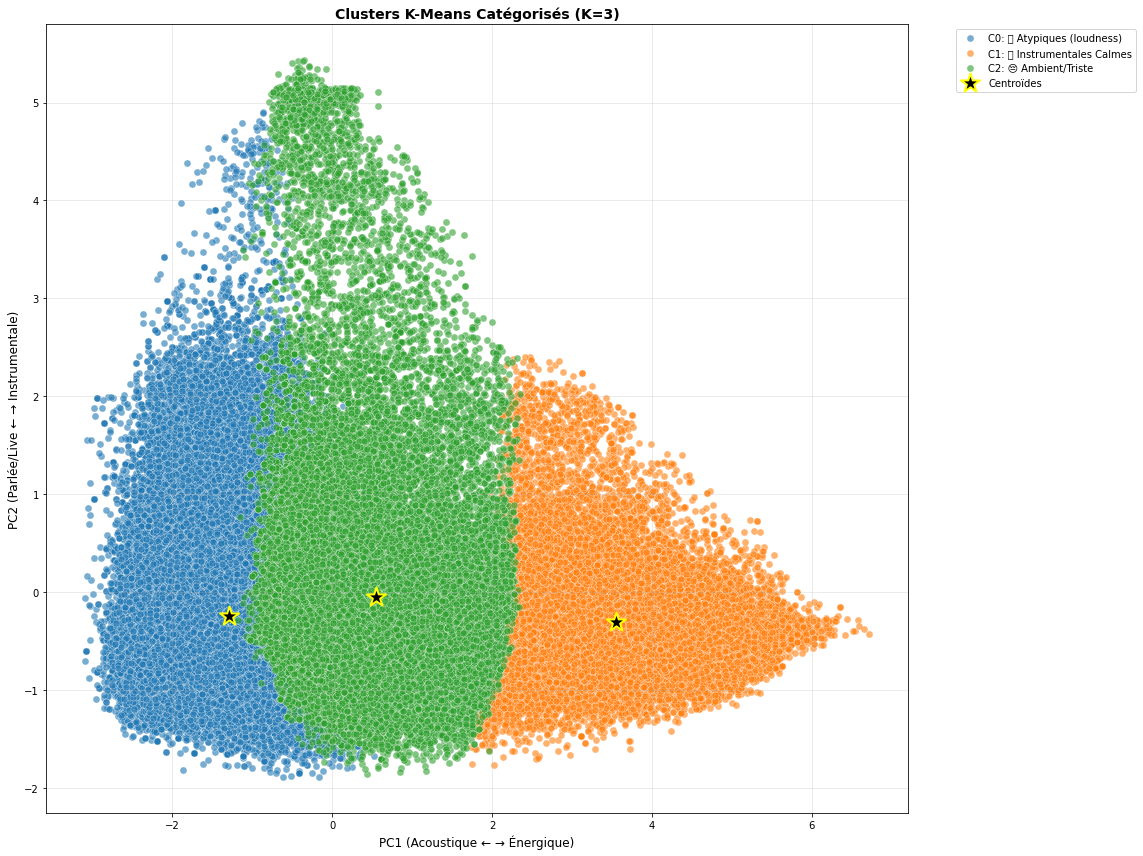


📋 RÉSUMÉ DES CATÉGORIES

🎵 Atypiques (loudness)
  ├─ Cluster ID: 0
  ├─ Taille: 125012 chansons
  └─ Profil: Profil non-standard dominé par loudness

🎻 Instrumentales Calmes
  ├─ Cluster ID: 1
  ├─ Taille: 31527 chansons
  └─ Profil: Musique instrumentale douce, sans paroles

😔 Ambient/Triste
  ├─ Cluster ID: 2
  ├─ Taille: 64549 chansons
  └─ Profil: Très calme, atmosphère mélancolique

✅ Dataset avec clusters et catégories sauvegardé!


In [25]:
# Après avoir obtenu les clusters K-Means
print("\n" + "="*60)
print("🏷️ CATÉGORISATION DES CLUSTERS")
print("="*60)
df_clean = df[features_clustering + ['genre', 'artist_name','track_name','super_genre',
    'genre_target_encoding',
    'genre_target_encoding1',
    'super_genre_SuperGenre_0',
    'super_genre_SuperGenre_1',
    'super_genre_SuperGenre_2',
    
    # Encodages d'artiste
    'artist_audio_encoding',
    'artist_audio_encoding1',
    'artist_audio_encoding2',
    'artist_cluster']].copy()
# 1. Calculer les moyennes "normales" (sur tout le dataset)
features_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo']

normal_means = df_clean[features_clustering].mean()
print("\n📊 Moyennes globales du dataset:")
print(normal_means)

# 2. Ajouter les labels de clusters au DataFrame
df_no_na = df_clean[features_clustering].dropna()
normal_indices = df_no_na.index[ko['mask_normal']]

  # Créer un DataFrame pour le clustering
df_clustered = df_clean.loc[normal_indices].copy()
df_clustered['cluster'] = labels_clean
# 3. Analyser et catégoriser chaque cluster
cluster_info = {}

for cluster_id in range(optimal_k):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print('='*60)
    
    # Extraire les données du cluster
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    
    # Obtenir la catégorie
    category, profile, diffs = categorize_cluster(cluster_data, normal_means)
    
    # Afficher les informations
    print(f"\n🎯 Catégorie: {category}")
    print(f"📝 Profil: {profile}")
    print(f"📈 Taille: {len(cluster_data)} chansons ({len(cluster_data)/len(df_clean)*100:.1f}%)")
    
    print(f"\n🔍 Écarts par rapport à la normale:")
    for feat, diff in sorted(diffs.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
        symbol = "↑" if diff > 0 else "↓"
        print(f"   {feat:20s}: {symbol} {abs(diff):6.1f}%")
    
    print(f"\n📌 Moyennes du cluster:")
    cluster_means = cluster_data[features_clustering].mean()
    for feat in features_clustering:
        print(f"   {feat:20s}: {cluster_means[feat]:.3f}")
    
    # Stocker les infos
    cluster_info[cluster_id] = {
        'category': category,
        'profile': profile,
        'size': len(cluster_data),
        'means': cluster_means.to_dict(),
        'diffs': diffs
    }

# 4. Ajouter les catégories au DataFrame
df_clustered['category'] = df_clustered['cluster'].map(
    lambda x: cluster_info[x]['category']
)

# 5. Visualisation avec les noms de catégories
plt.figure(figsize=(16, 12))

for cluster_id in range(optimal_k):
    mask = labels_clean == cluster_id
    category_name = cluster_info[cluster_id]['category']
    
    plt.scatter(X_clean[mask, 0], X_clean[mask, 1], 
               label=f'C{cluster_id}: {category_name}',
               alpha=0.6, s=50, edgecolors='w', linewidth=0.5)

# Centroïdes
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='black', s=400, marker='*', 
           edgecolors='yellow', linewidth=2, 
           label='Centroïdes', zorder=10)

plt.xlabel('PC1 (Acoustique ← → Énergique)', fontsize=12)
plt.ylabel('PC2 (Parlée/Live ← → Instrumentale)', fontsize=12)
plt.title(f'Clusters K-Means Catégorisés (K={optimal_k})', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('5_kmeans_categorized.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Résumé final
print("\n" + "="*60)
print("📋 RÉSUMÉ DES CATÉGORIES")
print("="*60)

for cluster_id in sorted(cluster_info.keys()):
    info = cluster_info[cluster_id]
    print(f"\n{info['category']}")
    print(f"  ├─ Cluster ID: {cluster_id}")
    print(f"  ├─ Taille: {info['size']} chansons")
    print(f"  └─ Profil: {info['profile']}")

# 7. Sauvegarder les résultats
df_clean.to_csv('spotify_clustered_categorized.csv', index=False)
print("\n✅ Dataset avec clusters et catégories sauvegardé!")

# 8. Mettre à jour le dictionnaire db
db.update({
    'cluster_info': cluster_info,
    'df_clustered': df_clustered,
    'normal_means': normal_means
})



🗂️ K-MEANS SUR OUTLIERS (K=2)

🎯 Clustering avec K=2...

📊 Métriques:
   Silhouette Score: 0.592
   Davies-Bouldin: 0.747
   Inertie: 80871.01

📈 Distribution:
   Cluster 0: 8530 (73.3%)
   Cluster 1: 3107 (26.7%)


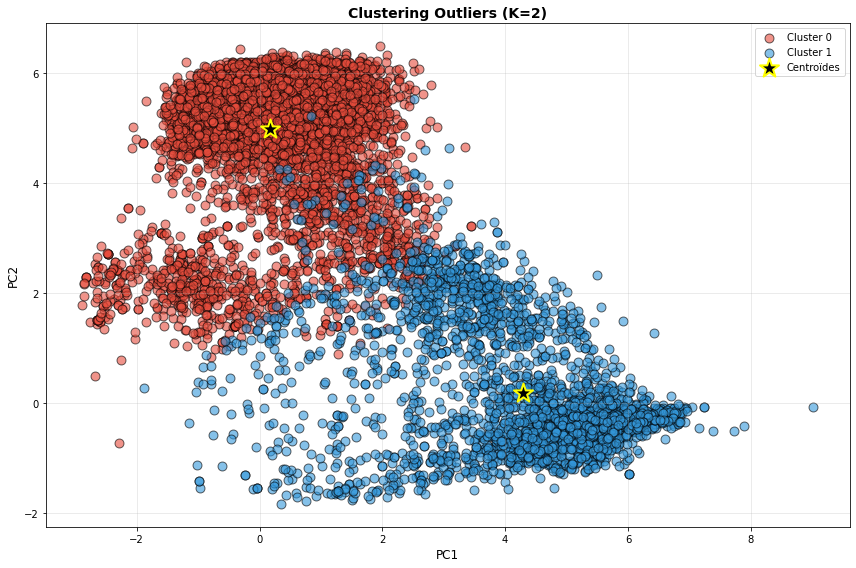


✅ Terminé! K=2 fixé pour les outliers


In [52]:
    
   print("\n" + "="*60)
print("🗂️ K-MEANS SUR OUTLIERS (K=2)")
print("="*60)

# ============================================================================
# CLUSTERING DIRECT AVEC K=2
# ============================================================================

k_fixed =2

print(f"\n🎯 Clustering avec K={k_fixed}...")

# K-Means
kmeans_final = KMeans(n_clusters=k_fixed, random_state=42, n_init=10)
outlier_labels = kmeans_final.fit_predict(X_outliers)
centroids = kmeans_final.cluster_centers_

# Métriques
silhouette_k2 = silhouette_score(X_outliers, outlier_labels)
davies_bouldin_k2 = davies_bouldin_score(X_outliers, outlier_labels)
inertia_k2 = kmeans_final.inertia_

print(f"\n📊 Métriques:")
print(f"   Silhouette Score: {silhouette_k2:.3f}")
print(f"   Davies-Bouldin: {davies_bouldin_k2:.3f}")
print(f"   Inertie: {inertia_k2:.2f}")

# Distribution
unique, counts = np.unique(outlier_labels, return_counts=True)
print(f"\n📈 Distribution:")
for cluster_id, count in zip(unique, counts):
    percentage = (count / len(outlier_labels)) * 100
    print(f"   Cluster {cluster_id}: {count} ({percentage:.1f}%)")

# Visualisation
plt.figure(figsize=(12, 8))

colors = ['#e74c3c', '#3498db']
for i in range(k_fixed):
    mask = outlier_labels == i
    plt.scatter(X_outliers[mask, 0], X_outliers[mask, 1], 
               c=colors[i], label=f'Cluster {i}',
               alpha=0.6, s=80, edgecolors='black', linewidth=1)

plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='black', s=400, marker='*', 
           edgecolors='yellow', linewidth=2, label='Centroïdes')

plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.title(f'Clustering Outliers (K={k_fixed})', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_outliers_k2.png', dpi=300, bbox_inches='tight')
plt.show()

# Sauvegarder
db_outliers = {
    'kmeans_model': kmeans_final,
    'labels': outlier_labels,
    'optimal_k': k_fixed,
    'centroids': centroids,
    'silhouette': silhouette_k2,
    'davies_bouldin': davies_bouldin_k2,
    'inertia': inertia_k2,
}

print("\n✅ Terminé! K=2 fixé pour les outliers")
   


🏷️ CATÉGORISATION DES CLUSTERS

📊 Moyennes globales du dataset:
danceability       -2.637278e-15
energy              2.135201e-15
loudness           -2.351302e-17
speechiness        -7.926363e-16
acousticness       -3.416839e-16
instrumentalness   -8.930502e-14
liveness            1.063045e-15
valence             3.596597e-16
tempo              -2.725601e-16
dtype: float64

CLUSTER 0

🎯 Catégorie: 🗣️ Spoken Word/Podcast
📝 Profil: Contenu principalement parlé
📈 Taille: 8530 chansons (3.7%)

🔍 Écarts par rapport à la normale:
   loudness            : ↑ 1833784436832608000.0%
   speechiness         : ↓ 494369319004621824.0%
   acousticness        : ↓ 329232892665615808.0%
   liveness            : ↑ 268159809327982336.0%
   tempo               : ↑ 239900152272125760.0%

📌 Moyennes du cluster:
   danceability        : -0.015
   energy              : 0.361
   loudness            : -0.431
   speechiness         : 3.919
   acousticness        : 1.125
   instrumentalness    : -0.477
   livenes

C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\1249311693.py:101: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\1249311693.py:101: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  plt.tight_layout()
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\1249311693.py:102: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  plt.savefig('5_kmeans_categorized outlier.png', dpi=300, bbox_inches='tight')
C:\Users\MSI\AppData\Local\Temp\ipykernel_18008\1249311693.py:102: UserWarning: Glyph 127931 (\N{VIOLIN}) missing from current font.
  plt.savefig('5_kmeans_categorized outlier.png', dpi=300, bbox_inches='tight')
C:\Users\MSI\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\MSI\anaconda3

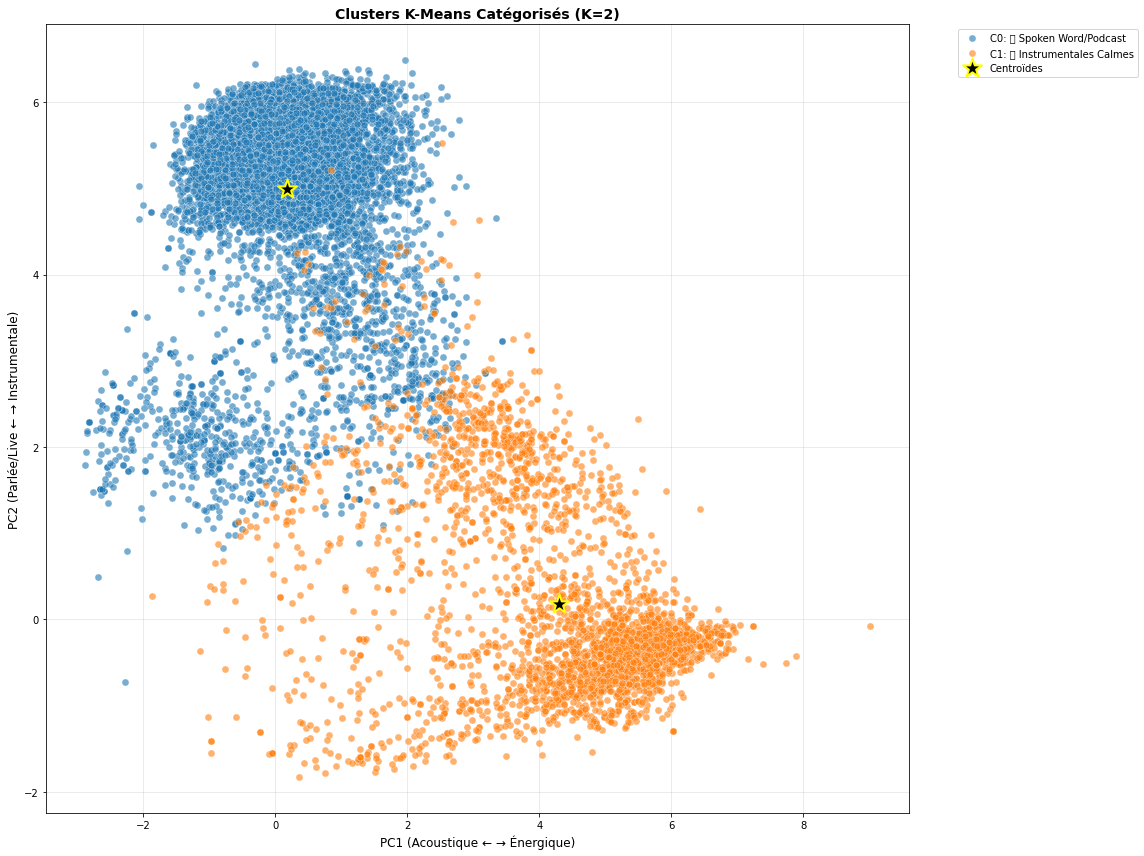


📋 RÉSUMÉ DES CATÉGORIES

🗣️ Spoken Word/Podcast
  ├─ Cluster ID: 0
  ├─ Taille: 8530 chansons
  └─ Profil: Contenu principalement parlé

🎻 Instrumentales Calmes
  ├─ Cluster ID: 1
  ├─ Taille: 3107 chansons
  └─ Profil: Musique instrumentale douce, sans paroles

✅ Dataset avec clusters et catégories sauvegardé!


In [54]:
# Après avoir obtenu les clusters K-Means
print("\n" + "="*60)
print("🏷️ CATÉGORISATION DES CLUSTERS")
print("="*60)
optimal_k=k_fixed
df_clean = df[features_clustering + ['genre', 'artist_name','track_name','super_genre',
    'genre_target_encoding',
    'genre_target_encoding1',
    'super_genre_SuperGenre_0',
    'super_genre_SuperGenre_1',
    'super_genre_SuperGenre_2',
    
    # Encodages d'artiste
    'artist_audio_encoding',
    'artist_audio_encoding1',
    'artist_audio_encoding2',
    'artist_cluster']].copy()
# 1. Calculer les moyennes "normales" (sur tout le dataset)
features_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo']

normal_means = df_clean[features_clustering].mean()
print("\n📊 Moyennes globales du dataset:")
print(normal_means)

# 2. Ajouter les labels de clusters au DataFrame
df_no_na = df_clean[features_clustering].dropna()
normal_indices = df_no_na.index[ko['mask_outliers']]

  # Créer un DataFrame pour le clustering
df_clustered = df_clean.loc[normal_indices].copy()
df_clustered['cluster'] = outlier_labels
# 3. Analyser et catégoriser chaque cluster
cluster_info = {}

for cluster_id in range(optimal_k):
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print('='*60)
    
    # Extraire les données du cluster
    cluster_data = df_clustered[df_clustered['cluster'] == cluster_id]
    
    # Obtenir la catégorie
    category, profile, diffs = categorize_cluster(cluster_data, normal_means)
    
    # Afficher les informations
    print(f"\n🎯 Catégorie: {category}")
    print(f"📝 Profil: {profile}")
    print(f"📈 Taille: {len(cluster_data)} chansons ({len(cluster_data)/len(df_clean)*100:.1f}%)")
    
    print(f"\n🔍 Écarts par rapport à la normale:")
    for feat, diff in sorted(diffs.items(), key=lambda x: abs(x[1]), reverse=True)[:5]:
        symbol = "↑" if diff > 0 else "↓"
        print(f"   {feat:20s}: {symbol} {abs(diff):6.1f}%")
    
    print(f"\n📌 Moyennes du cluster:")
    cluster_means = cluster_data[features_clustering].mean()
    for feat in features_clustering:
        print(f"   {feat:20s}: {cluster_means[feat]:.3f}")
    
    # Stocker les infos
    cluster_info[cluster_id] = {
        'category': category,
        'profile': profile,
        'size': len(cluster_data),
        'means': cluster_means.to_dict(),
        'diffs': diffs
    }

# 4. Ajouter les catégories au DataFrame
df_clustered['category'] = df_clustered['cluster'].map(
    lambda x: cluster_info[x]['category']
)

# 5. Visualisation avec les noms de catégories
plt.figure(figsize=(16, 12))

for cluster_id in range(optimal_k):
    mask = outlier_labels == cluster_id
    category_name = cluster_info[cluster_id]['category']
    
    plt.scatter(X_outliers[mask, 0], X_outliers[mask, 1], 
               label=f'C{cluster_id}: {category_name}',
               alpha=0.6, s=50, edgecolors='w', linewidth=0.5)

# Centroïdes
centroids = kmeans_final.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
           c='black', s=400, marker='*', 
           edgecolors='yellow', linewidth=2, 
           label='Centroïdes', zorder=10)

plt.xlabel('PC1 (Acoustique ← → Énergique)', fontsize=12)
plt.ylabel('PC2 (Parlée/Live ← → Instrumentale)', fontsize=12)
plt.title(f'Clusters K-Means Catégorisés (K={optimal_k})', 
          fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('5_kmeans_categorized outlier.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

# 6. Résumé final
print("\n" + "="*60)
print("📋 RÉSUMÉ DES CATÉGORIES")
print("="*60)

for cluster_id in sorted(cluster_info.keys()):
    info = cluster_info[cluster_id]
    print(f"\n{info['category']}")
    print(f"  ├─ Cluster ID: {cluster_id}")
    print(f"  ├─ Taille: {info['size']} chansons")
    print(f"  └─ Profil: {info['profile']}")

# 7. Sauvegarder les résultats
df_clean.to_csv('spotify_clustered_categorized.csv', index=False)
print("\n✅ Dataset avec clusters et catégories sauvegardé!")

# 8. Mettre à jour le dictionnaire db
db.update({
    'cluster_info_outlier': cluster_info,
    'df_clustered_outlier': df_clustered,
    'normal_means': normal_means
})


In [55]:
df2=df_clustered.copy()
dffinal=pd.concat([df1, df2], axis=0)


In [61]:
dffinal.head()

danceability    energy  loudness  speechiness  acousticness  \
0     -0.890935  1.286908  1.290703    -0.367970      0.683376   
1      0.191994  0.630249  0.668683    -0.183082     -0.345467   
2      0.585296 -1.669954 -0.718402    -0.455832      1.644570   
3     -1.693703 -0.929789 -0.434817    -0.438044      0.942701   
4     -1.203422 -1.313157 -1.930601    -0.405163      1.638932   

   instrumentalness  liveness   valence     tempo  genre  ...  \
0         -0.489819  0.660661  1.380744  1.595607  Movie  ...   
1         -0.489819 -0.322835  1.388435  1.823253  Movie  ...   
2         -0.489819 -0.564927 -0.334212 -0.588326  Movie  ...   
3         -0.489819 -0.587623 -0.876384  1.750597  Movie  ...   
4         -0.083566 -0.065613 -0.249618  0.741433  Movie  ...   

  genre_target_encoding1 super_genre_SuperGenre_0 super_genre_SuperGenre_1  \
0                0.13452                        0                        1   
1                0.13452                        0                        1   
2                0.13452                        0                        1   
3                0.13452                        0                        1   
4                0.13452                        0                        1   

   super_genre_SuperGenre_2  artist_audio_encoding  artist_audio_encoding1  \
0                         0               0.361713                0.383266   
1                         0              -0.141740                1.006398   
2                         0               1.090598               -0.204519   
3                         0               0.361713                0.383266   
4                         0               0.026896               -0.352960   

   artist_audio_encoding2   artist_cluster  cluster                 category  
0               -0.684136  ArtistCluster_0        0   🎵 Atypiques (loudness)  
1               -0.883575  ArtistCluster_3        0   🎵 Atypiques (loudness)  
2               -0.832909  ArtistCluster_0        2         😔 Ambient/Triste  
3               -0.684136  ArtistCluster_0        2         😔 Ambient/Triste  
4               -0.720869  ArtistCluster_0        1  🎻 Instrumentales Calmes  

[5 rows x 24 columns]

In [66]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler

# ============================================================================
# SYSTÈME DE RECOMMANDATION AVANCÉ AVEC ENCODAGES
# ============================================================================

class AdvancedMusicRecommender:
    """
    Système de recommandation musical utilisant:
    - Features audio (energy, danceability, etc.)
    - Encodages de genre (genre_target_encoding, super_genre)
    - Encodages d'artiste (artist_audio_encoding, artist_cluster)
    - Clusters K-Means
    """
    
    def __init__(self, cluster_data, use_genre_encoding=True, 
                 use_artist_encoding=True, weights=None):
        """
        Initialiser le recommender avancé
        
        Parameters:
        -----------
        cluster_data : DataFrame avec toutes les features et encodages
        use_genre_encoding : bool, utiliser les encodages de genre
        use_artist_encoding : bool, utiliser les encodages d'artiste
        weights : dict, pondération des différentes sources
                 ex: {'audio': 0.6, 'genre': 0.25, 'artist': 0.15}
        """
        self.cluster_data = cluster_data.copy()
        self.use_genre_encoding = use_genre_encoding
        self.use_artist_encoding = use_artist_encoding
        
        # Pondération par défaut
        if weights is None:
            self.weights = {
                'audio': 0.60,      # 60% basé sur le son
                'genre': 0.25,      # 25% basé sur le genre
                'artist': 0.15      # 15% basé sur l'artiste
            }
        else:
            self.weights = weights
        
        print("="*80)
        print("🎵 SYSTÈME DE RECOMMANDATION AVANCÉ INITIALISÉ")
        print("="*80)
        print(f"✓ Dataset: {len(cluster_data)} chansons")
        print(f"✓ Clusters: {cluster_data['cluster'].nunique()}")
        
        # ====================================================================
        # 1. FEATURES AUDIO
        # ====================================================================
        self.audio_features = ['danceability', 'energy', 'loudness', 
                               'speechiness', 'acousticness', 
                               'instrumentalness', 'liveness', 
                               'valence', 'tempo']
        self.audio_features = [f for f in self.audio_features 
                               if f in cluster_data.columns]
        
        print(f"\n📊 Features Audio ({len(self.audio_features)}):")
        print(f"   {', '.join(self.audio_features)}")
        
        # Normaliser les features audio
        self.scaler_audio = StandardScaler()
        self.X_audio_scaled = self.scaler_audio.fit_transform(
            cluster_data[self.audio_features].fillna(0)
        )
        
        # ====================================================================
        # 2. ENCODAGES DE GENRE
        # ====================================================================
        self.genre_features = []
        
        # Target encoding du genre
        if 'genre_target_encoding' in cluster_data.columns:
            self.genre_features.append('genre_target_encoding')
        if 'genre_target_encoding1' in cluster_data.columns:
            self.genre_features.append('genre_target_encoding1')
        
        # Super genre (one-hot encoding)
        super_genre_cols = [col for col in cluster_data.columns 
                           if col.startswith('super_genre_SuperGenre_')]
        self.genre_features.extend(super_genre_cols)
        
        # NE PAS inclure 'super_genre' si c'est du texte
        # (déjà encodé en one-hot avec les colonnes super_genre_SuperGenre_X)
        
        if self.genre_features and use_genre_encoding:
            print(f"\n🎭 Encodages de Genre ({len(self.genre_features)}):")
            print(f"   {', '.join(self.genre_features[:5])}...")
            
            self.scaler_genre = StandardScaler()
            self.X_genre_scaled = self.scaler_genre.fit_transform(
                cluster_data[self.genre_features].fillna(0)
            )
        else:
            self.X_genre_scaled = None
            print("\n⚠️ Pas d'encodages de genre disponibles")
        
        # ====================================================================
        # 3. ENCODAGES D'ARTISTE
        # ====================================================================
        self.artist_features = []
        
        # Artist audio encoding
        artist_audio_cols = [col for col in cluster_data.columns 
                            if col.startswith('artist_audio_encoding')]
        self.artist_features.extend(artist_audio_cols)
        
        # Artist cluster (one-hot uniquement, PAS le texte)
        artist_cluster_cols = [col for col in cluster_data.columns 
                              if col.startswith('artist_cluster_ArtistCluster_')]
        self.artist_features.extend(artist_cluster_cols)
        
        # NE PAS inclure 'artist_cluster' si c'est du texte
        # (déjà encodé en one-hot avec les colonnes artist_cluster_ArtistCluster_X)
        
        if self.artist_features and use_artist_encoding:
            print(f"\n🎤 Encodages d'Artiste ({len(self.artist_features)}):")
            print(f"   {', '.join(self.artist_features)}")
            
            self.scaler_artist = StandardScaler()
            self.X_artist_scaled = self.scaler_artist.fit_transform(
                cluster_data[self.artist_features].fillna(0)
            )
        else:
            self.X_artist_scaled = None
            print("\n⚠️ Pas d'encodages d'artiste disponibles")
        
        # ====================================================================
        # 4. MATRICE COMBINÉE
        # ====================================================================
        print(f"\n⚖️ Pondération:")
        print(f"   Audio: {self.weights['audio']*100:.0f}%")
        print(f"   Genre: {self.weights['genre']*100:.0f}%")
        print(f"   Artiste: {self.weights['artist']*100:.0f}%")
        
        print("\n✅ Système prêt!")
    
    
    def calculate_distance(self, idx1, idx2):
        """
        Calculer la distance hybride entre deux chansons
        
        Returns:
        --------
        float: distance totale pondérée
        dict: détails des distances par catégorie
        """
        pos1 = self.cluster_data.index.get_loc(idx1)
        pos2 = self.cluster_data.index.get_loc(idx2)
        
        distances = {}
        
        # 1. Distance audio
        dist_audio = euclidean(
            self.X_audio_scaled[pos1], 
            self.X_audio_scaled[pos2]
        )
        distances['audio'] = dist_audio
        
        # 2. Distance genre
        if self.X_genre_scaled is not None and self.use_genre_encoding:
            dist_genre = euclidean(
                self.X_genre_scaled[pos1],
                self.X_genre_scaled[pos2]
            )
            distances['genre'] = dist_genre
        else:
            distances['genre'] = 0
        
        # 3. Distance artiste
        if self.X_artist_scaled is not None and self.use_artist_encoding:
            dist_artist = euclidean(
                self.X_artist_scaled[pos1],
                self.X_artist_scaled[pos2]
            )
            distances['artist'] = dist_artist
        else:
            distances['artist'] = 0
        
        # Distance totale pondérée
        total_distance = (
            self.weights['audio'] * distances['audio'] +
            self.weights['genre'] * distances['genre'] +
            self.weights['artist'] * distances['artist']
        )
        
        distances['total'] = total_distance
        
        return total_distance, distances
    
    
    def find_song(self, song_name, artist_name=None):
        """Trouver une chanson dans le dataset"""
        # MODIFIÉ: 'name' → 'track_name'
        mask = self.cluster_data['track_name'].str.contains(
            song_name, case=False, na=False
        )
        
        if artist_name:
            # MODIFIÉ: 'artists' → 'artist_name'
            mask &= self.cluster_data['artist_name'].str.contains(
                artist_name, case=False, na=False
            )
        
        matches = self.cluster_data[mask]
        
        if len(matches) == 0:
            return None
        elif len(matches) > 1:
            print(f"\n⚠️ {len(matches)} chansons trouvées:")
            for idx, row in matches.head(10).iterrows():
                # MODIFIÉ: 'name' → 'track_name', 'artists' → 'artist_name'
                print(f"  • {row['track_name']} - {row['artist_name']}")
            print("\n💡 Spécifiez l'artiste pour affiner")
            return matches.index[0]
        else:
            return matches.index[0]
    
    
    def recommend(self, song_name, artist_name=None, n_recommendations=10,
                  use_cluster_filter=True, exclude_same_artist=False,
                  show_distance_breakdown=True, verbose=True):
        """
        Recommander des chansons en utilisant TOUS les encodages
        """
        
        if verbose:
            print("\n" + "="*80)
            print("🔍 RECHERCHE DE RECOMMANDATIONS AVANCÉES")
            print("="*80)
        
        # Trouver la chanson
        song_idx = self.find_song(song_name, artist_name)
        
        if song_idx is None:
            print(f"❌ Chanson non trouvée: '{song_name}'")
            return None
        
        song_info = self.cluster_data.loc[song_idx]
        song_cluster = song_info['cluster']
        
        if verbose:
            print(f"\n✓ Chanson trouvée:")
            # MODIFIÉ: 'name' → 'track_name', 'artists' → 'artist_name'
            print(f"  Titre: {song_info['track_name']}")
            print(f"  Artiste: {song_info['artist_name']}")
            print(f"  Cluster: {song_cluster}")
            
            # Afficher les encodages
            if 'genre_target_encoding' in song_info:
                print(f"  Genre encoding: {song_info['genre_target_encoding']:.3f}")
            if self.artist_features:
                print(f"  Artist features: {len(self.artist_features)} dimensions")
        
        # Filtrer par cluster
        if use_cluster_filter:
            search_space = self.cluster_data[
                self.cluster_data['cluster'] == song_cluster
            ]
            if verbose:
                print(f"\n🔍 Recherche dans Cluster {song_cluster}: {len(search_space)} chansons")
        else:
            search_space = self.cluster_data
        
        search_space = search_space[search_space.index != song_idx]
        
        if exclude_same_artist:
            # MODIFIÉ: 'artists' → 'artist_name'
            search_space = search_space[
                search_space['artist_name'] != song_info['artist_name']
            ]
        
        # Calculer distances
        if verbose:
            print(f"\n📏 Calcul des distances hybrides...")
        
        distances_list = []
        distance_breakdowns = []
        
        for idx in search_space.index:
            total_dist, breakdown = self.calculate_distance(song_idx, idx)
            distances_list.append(total_dist)
            distance_breakdowns.append(breakdown)
        
        search_space = search_space.copy()
        search_space['distance'] = distances_list
        search_space['dist_audio'] = [d['audio'] for d in distance_breakdowns]
        search_space['dist_genre'] = [d['genre'] for d in distance_breakdowns]
        search_space['dist_artist'] = [d['artist'] for d in distance_breakdowns]
        
        # Trier par distance
        recommendations = search_space.sort_values('distance').head(n_recommendations)
        
        # Afficher résultats
        if verbose:
            print("\n" + "="*80)
            print(f"🎯 TOP {n_recommendations} RECOMMANDATIONS")
            print("="*80)
            
            for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
                # MODIFIÉ: 'name' → 'track_name', 'artists' → 'artist_name'
                print(f"\n{i}. {row['track_name']}")
                print(f"   👤 Artiste: {row['artist_name']}")
                print(f"   📏 Distance totale: {row['distance']:.4f}")
                
                if show_distance_breakdown:
                    print(f"   📊 Détail:")
                    print(f"      • Audio: {row['dist_audio']:.4f} "
                          f"({self.weights['audio']*100:.0f}%)")
                    if self.use_genre_encoding and row['dist_genre'] > 0:
                        print(f"      • Genre: {row['dist_genre']:.4f} "
                              f"({self.weights['genre']*100:.0f}%)")
                    if self.use_artist_encoding and row['dist_artist'] > 0:
                        print(f"      • Artiste: {row['dist_artist']:.4f} "
                              f"({self.weights['artist']*100:.0f}%)")
                
                # Similarités
                reasons = []
                if row['dist_audio'] < 1.0:
                    reasons.append("son similaire")
                if self.use_genre_encoding and row['dist_genre'] < 0.5:
                    reasons.append("même genre musical")
                if self.use_artist_encoding and row['dist_artist'] < 0.5:
                    reasons.append("style d'artiste similaire")
                if row['cluster'] == song_cluster:
                    reasons.append(f"cluster {song_cluster}")
                
                if reasons:
                    print(f"   💡 Pourquoi: {', '.join(reasons)}")
        
        return recommendations
    
    
    def compare_with_without_encodings(self, song_name, artist_name=None, 
                                       n_recommendations=10):
        """
        Comparer recommandations avec/sans encodages
        """
        print("\n" + "="*80)
        print("⚖️ COMPARAISON: AUDIO SEUL vs AUDIO + ENCODAGES")
        print("="*80)
        
        # Sauvegarder paramètres
        use_genre_orig = self.use_genre_encoding
        use_artist_orig = self.use_artist_encoding
        
        # 1. Audio seulement
        print("\n🔵 MÉTHODE 1: AUDIO FEATURES SEULEMENT")
        print("-"*80)
        self.use_genre_encoding = False
        self.use_artist_encoding = False
        self.weights = {'audio': 1.0, 'genre': 0.0, 'artist': 0.0}
        
        recs_audio_only = self.recommend(
            song_name, artist_name, n_recommendations, verbose=False
        )
        
        # 2. Audio + Encodages
        print("\n🟢 MÉTHODE 2: AUDIO + GENRE + ARTISTE")
        print("-"*80)
        self.use_genre_encoding = use_genre_orig
        self.use_artist_encoding = use_artist_orig
        self.weights = {'audio': 0.60, 'genre': 0.25, 'artist': 0.15}
        
        recs_full = self.recommend(
            song_name, artist_name, n_recommendations, verbose=False
        )
        
        # Comparer
        if recs_audio_only is not None and recs_full is not None:
            common = set(recs_audio_only.index) & set(recs_full.index)
            overlap = len(common) / n_recommendations * 100
            
            print(f"\n📊 Analyse:")
            print(f"   Chevauchement: {overlap:.1f}% de chansons en commun")
            print(f"\n   Uniques à audio seul: {len(set(recs_audio_only.index) - common)}")
            print(f"   Uniques à encodages: {len(set(recs_full.index) - common)}")
            
            print(f"\n💡 Les encodages apportent {100-overlap:.1f}% de nouvelles recommandations!")
    
    
    def visualize_distance_components(self, song_name, artist_name=None,
                                      n_recommendations=10):
        """
        Visualiser la contribution de chaque composante de distance
        """
        recs = self.recommend(song_name, artist_name, n_recommendations, 
                             verbose=False, show_distance_breakdown=True)
        
        if recs is None:
            return
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # 1. Distance totale
        ax = axes[0, 0]
        ax.barh(range(len(recs)), recs['distance'], color='steelblue')
        ax.set_yticks(range(len(recs)))
        # MODIFIÉ: 'name' → 'track_name'
        ax.set_yticklabels([f"{row['track_name'][:30]}..." 
                           for _, row in recs.iterrows()])
        ax.set_xlabel('Distance Totale')
        ax.set_title('Distance Totale (plus faible = plus similaire)', 
                    fontweight='bold')
        ax.invert_yaxis()
        ax.grid(True, alpha=0.3, axis='x')
        
        # 2. Stacked bar des composantes
        ax = axes[0, 1]
        width = 0.8
        x = range(len(recs))
        
        p1 = ax.bar(x, recs['dist_audio'] * self.weights['audio'], 
                   width, label='Audio', color='#FF6B6B')
        p2 = ax.bar(x, recs['dist_genre'] * self.weights['genre'], 
                   width, bottom=recs['dist_audio'] * self.weights['audio'],
                   label='Genre', color='#4ECDC4')
        p3 = ax.bar(x, recs['dist_artist'] * self.weights['artist'],
                   width, 
                   bottom=recs['dist_audio'] * self.weights['audio'] + 
                          recs['dist_genre'] * self.weights['genre'],
                   label='Artiste', color='#95E1D3')
        
        ax.set_ylabel('Distance Pondérée')
        ax.set_xlabel('Rang de recommandation')
        ax.set_title('Contribution de chaque composante', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3, axis='y')
        
        # 3. Radar chart (première recommandation)
        ax = axes[1, 0]
        ax.remove()
        ax = fig.add_subplot(2, 2, 3, projection='polar')
        
        categories = ['Audio', 'Genre', 'Artiste']
        values = [
            recs.iloc[0]['dist_audio'],
            recs.iloc[0]['dist_genre'],
            recs.iloc[0]['dist_artist']
        ]
        
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        values += values[:1]
        angles += angles[:1]
        
        ax.plot(angles, values, 'o-', linewidth=2, color='red')
        ax.fill(angles, values, alpha=0.25, color='red')
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        # MODIFIÉ: 'name' → 'track_name'
        ax.set_title(f'Profil de distance: {recs.iloc[0]["track_name"][:30]}', 
                    fontweight='bold', pad=20)
        ax.grid(True)
        
        # 4. Heatmap des distances
        ax = axes[1, 1]
        dist_matrix = recs[['dist_audio', 'dist_genre', 'dist_artist']].T
        sns.heatmap(dist_matrix, annot=True, fmt='.3f', cmap='RdYlGn_r',
                   xticklabels=[f"#{i+1}" for i in range(len(recs))],
                   yticklabels=['Audio', 'Genre', 'Artiste'],
                   ax=ax, cbar_kws={'label': 'Distance'})
        ax.set_title('Heatmap des distances par composante', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig('distance_components_analysis.png', dpi=300, bbox_inches='tight')
        print("\n✅ Graphique sauvegardé : distance_components_analysis.png")
        plt.show()


# ============================================================================
# GUIDE D'UTILISATION
# ============================================================================

print("\n" + "="*80)
print("🚀 GUIDE D'UTILISATION COMPLET")
print("="*80)

print("""
# COLONNES REQUISES DANS LE DATASET:
# - track_name    (titre de la chanson)
# - artist_name   (nom de l'artiste)
# - cluster       (cluster K-means)
# - Features audio : danceability, energy, loudness, speechiness, acousticness, 
#                    instrumentalness, liveness, valence, tempo
# - Encodages genre (optionnel) : genre_target_encoding, super_genre_SuperGenre_X
# - Encodages artiste (optionnel) : artist_audio_encoding, artist_audio_encoding1, etc.

# 1. Charger les données
import pandas as pd
cluster_data = pd.read_csv('spotify_with_clusters.csv')

# 2. Initialiser avec TOUS les encodages
recommender = AdvancedMusicRecommender(
    cluster_data,
    use_genre_encoding=True,    # Utiliser genre_target_encoding + super_genre
    use_artist_encoding=True,   # Utiliser artist_audio_encoding + artist_cluster
    weights={'audio': 0.6, 'genre': 0.25, 'artist': 0.15}
)

# 3. Recommandations simples
recs = recommender.recommend("Bohemian Rhapsody", n_recommendations=10)

# 4. Recommandations avec nom d'artiste pour préciser
recs = recommender.recommend("Yesterday", artist_name="Beatles", n_recommendations=10)

# 5. Voir le détail des distances (audio + genre + artiste)
recs = recommender.recommend("Shape of You", 
                            show_distance_breakdown=True,
                            n_recommendations=10)

# 6. Exclure le même artiste des recommandations
recs = recommender.recommend("Bohemian Rhapsody", 
                            exclude_same_artist=True,
                            n_recommendations=10)

# 7. Comparer avec/sans encodages
recommender.compare_with_without_encodings("Yesterday", n_recommendations=10)

# 8. Visualiser les contributions de chaque composante
recommender.visualize_distance_components("Smells Like Teen Spirit", 
                                         n_recommendations=10)

# 9. Ajuster les pondérations selon vos besoins
recommender.weights = {
    'audio': 0.5,      # 50% son
    'genre': 0.4,      # 40% genre (plus important)
    'artist': 0.1      # 10% artiste
}
recs = recommender.recommend("Hello", n_recommendations=10)

# 10. Désactiver certains encodages
recommender.use_genre_encoding = False  # Seulement audio + artiste
recs = recommender.recommend("Yesterday", n_recommendations=10)

# 11. Chercher dans tout le dataset (pas juste le cluster)
recs = recommender.recommend("Bohemian Rhapsody", 
                            use_cluster_filter=False,
                            n_recommendations=10)
""")

print("\n" + "="*80)
print("✅ Système prêt avec colonnes corrigées:")
print("   • track_name (titre)")
print("   • artist_name (artiste)")
print("="*80)


🚀 GUIDE D'UTILISATION COMPLET

# COLONNES REQUISES DANS LE DATASET:
# - track_name    (titre de la chanson)
# - artist_name   (nom de l'artiste)
# - cluster       (cluster K-means)
# - Features audio : danceability, energy, loudness, speechiness, acousticness, 
#                    instrumentalness, liveness, valence, tempo
# - Encodages genre (optionnel) : genre_target_encoding, super_genre_SuperGenre_X
# - Encodages artiste (optionnel) : artist_audio_encoding, artist_audio_encoding1, etc.

# 1. Charger les données
import pandas as pd
cluster_data = pd.read_csv('spotify_with_clusters.csv')

# 2. Initialiser avec TOUS les encodages
recommender = AdvancedMusicRecommender(
    cluster_data,
    use_genre_encoding=True,    # Utiliser genre_target_encoding + super_genre
    use_artist_encoding=True,   # Utiliser artist_audio_encoding + artist_cluster
    weights={'audio': 0.6, 'genre': 0.25, 'artist': 0.15}
)

# 3. Recommandations simples
recs = recommender.recommend("Bohemian Rhapsody", 

🎵 SYSTÈME DE RECOMMANDATION AVANCÉ INITIALISÉ
✓ Dataset: 232725 chansons
✓ Clusters: 3

📊 Features Audio (9):
   danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo

🎭 Encodages de Genre (5):
   genre_target_encoding, genre_target_encoding1, super_genre_SuperGenre_0, super_genre_SuperGenre_1, super_genre_SuperGenre_2...

🎤 Encodages d'Artiste (3):
   artist_audio_encoding, artist_audio_encoding1, artist_audio_encoding2

⚖️ Pondération:
   Audio: 60%
   Genre: 25%
   Artiste: 15%

✅ Système prêt!

🔍 RECHERCHE DE RECOMMANDATIONS AVANCÉES
❌ Chanson non trouvée: 'Joseph Williams'

🔍 RECHERCHE DE RECOMMANDATIONS AVANCÉES

⚠️ 5 chansons trouvées:
  • Shape of You - Colt Ford
  • Shape Of Your Heart - Hillsong UNITED
  • Shape of You - Ed Sheeran
  • Shape of You - Acoustic - Ed Sheeran
  • Shape Of Your Heart - Hillsong UNITED

💡 Spécifiez l'artiste pour affiner

✓ Chanson trouvée:
  Titre: Shape of You
  Artiste: Colt Ford
  Cluster: 0
  Gen

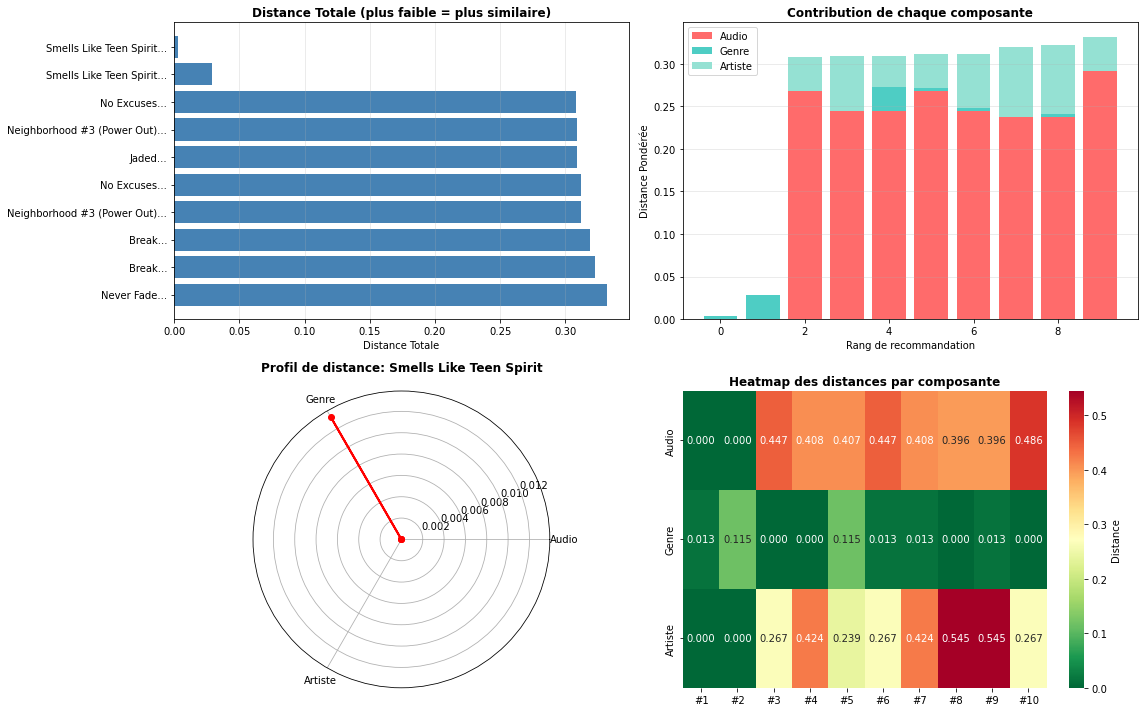


🔍 RECHERCHE DE RECOMMANDATIONS AVANCÉES

⚠️ 226 chansons trouvées:
  • Hello Walls - Willie Nelson
  • Hello It's Me - Todd Rundgren
  • Hello In There - John Prine
  • Hello, My Name Is - Matthew West
  • Say Hello 2 Heaven - 25th Anniversary Mix - Temple Of The Dog
  • Say Hello 2 Heaven - Temple Of The Dog
  • Hello Mr. Heartache - Dixie Chicks
  • Hello Darlin - Jelly Roll
  • Hello Mary Lou - The Statler Brothers
  • Hello Ego - Jhene Aiko

💡 Spécifiez l'artiste pour affiner

✓ Chanson trouvée:
  Titre: Hello Walls
  Artiste: Willie Nelson
  Cluster: 2
  Genre encoding: -0.575
  Artist features: 3 dimensions

🔍 Recherche dans Cluster 2: 64549 chansons

📏 Calcul des distances hybrides...

🎯 TOP 10 RECOMMANDATIONS

1. Just Because I'm a Woman
   👤 Artiste: Dolly Parton
   📏 Distance totale: 0.3303
   📊 Détail:
      • Audio: 0.6104 (50%)
      • Artiste: 0.2507 (10%)
   💡 Pourquoi: son similaire, même genre musical, style d'artiste similaire, cluster 2

2. Gonna Hurry (As Slow As I

In [67]:
# 1. Initialiser avec TOUS les encodages
recommender = AdvancedMusicRecommender(
    cluster_data=dffinal,
    use_genre_encoding=True,    # Utiliser genre_target_encoding + super_genre
    use_artist_encoding=True,   # Utiliser artist_audio_encoding + artist_cluster
    weights={'audio': 0.6, 'genre': 0.25, 'artist': 0.15}
)
# 2. Recommandations avec encodages
recs = recommender.recommend("Joseph Williams", n_recommendations=10)

# 3. Voir le détail des distances (audio + genre + artiste)
recs = recommender.recommend("Shape of You", 
                            show_distance_breakdown=True,
                            n_recommendations=10)

# 4. Comparer avec/sans encodages
recommender.compare_with_without_encodings("Yesterday", n_recommendations=10)

# 5. Visualiser les contributions
recommender.visualize_distance_components("Smells Like Teen Spirit", 
                                         n_recommendations=10)

# 6. Ajuster les pondérations selon vos besoins
recommender.weights = {
    'audio': 0.5,      # 50% son
    'genre': 0.4,      # 40% genre (plus important)
    'artist': 0.1      # 10% artiste
}
recs = recommender.recommend("Hello", n_recommendations=10)

# 7. Désactiver certains encodages
recommender.use_genre_encoding = False  # Seulement audio + artiste
recs = recommender.recommend("Yesterday", n_recommendations=10)



🎵 CLUSTERING PAR GENRE

📊 CLUSTERING PAR SUPER-GENRE

Super-genres disponibles: 3
SuperGenre_1    195743
SuperGenre_0     27301
SuperGenre_2      9681
Name: super_genre, dtype: int64

🎼 SUPER-GENRE: SuperGenre_1
   Nombre de chansons: 195743

🔹 Cluster 0: 21035 chansons
   Top genres: ['Hip-Hop', 'Rap', 'Reggaeton']
   Moyennes:
      energy: 0.624
      danceability: 0.696
      valence: 0.521
      acousticness: 0.246
   Exemples:
      • Yacht Club (feat. Juice WRLD) - Lil Yachty (Pop)
      • Impatient Freestyle - Drakeo the Ruler (Rap)
      • Lollipop - Lil Wayne (Pop)

🔹 Cluster 1: 39039 chansons
   Top genres: ['Folk', 'Movie', 'Indie']
   Moyennes:
      energy: 0.349
      danceability: 0.529
      valence: 0.359
      acousticness: 0.649
   Exemples:
      • Les portes de paris - Bruno Pelletier (Movie)
      • Drowning - Mario (Rap)
      • You've Got To Hide Your Love Away - Bill Frisell (Jazz)

🔹 Cluster 2: 53497 chansons
   Top genres: ['Ska', 'Alternative', 'Children’s

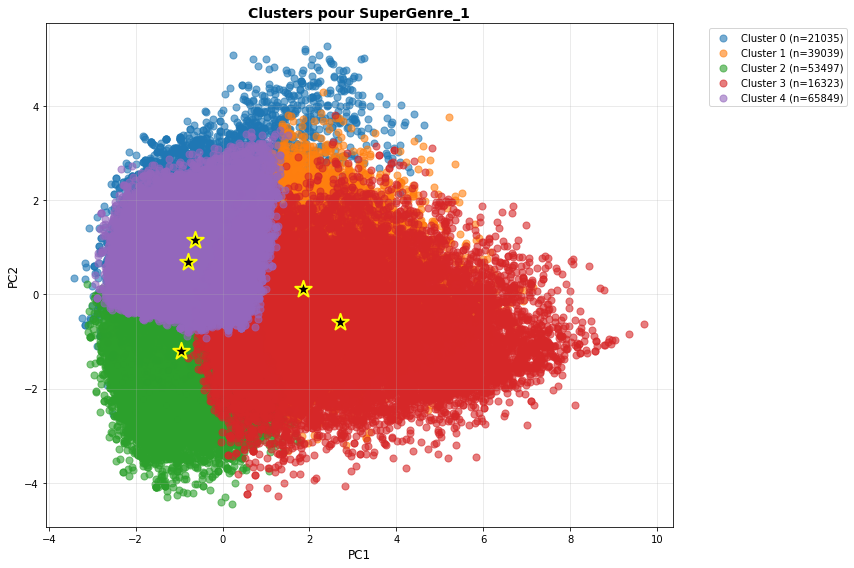


🎼 SUPER-GENRE: SuperGenre_0
   Nombre de chansons: 27301

🔹 Cluster 0: 11589 chansons
   Top genres: ['Soundtrack', 'Classical', 'Opera']
   Moyennes:
      energy: 0.109
      danceability: 0.212
      valence: 0.079
      acousticness: 0.887
   Exemples:
      • Piano Sonata No.14 In C Sharp Minor, Op.27 No.2 -"Moonlight": 3. Presto agitato - Live At The Royal Albert Hall/2012 - Ludwig van Beethoven (Classical)
      • Prélude in C-Sharp Minor, Op. 45 - Frédéric Chopin (Classical)
      • Giselle / Act 2: No. 20 Variation de Giselle (Alternate Version) - Adolphe Adam (Opera)

🔹 Cluster 1: 2730 chansons
   Top genres: ['Soundtrack', 'Classical', 'A Capella']
   Moyennes:
      energy: 0.579
      danceability: 0.352
      valence: 0.206
      acousticness: 0.221
   Exemples:
      • Scar Struck - Sarah Schachner (Soundtrack)
      • Tribal War - Hans Zimmer (Soundtrack)
      • Primal Judgment (From "Final Fantasy XIV") - Nobuo Uematsu (Classical)

🔹 Cluster 2: 1813 chansons
   Top g

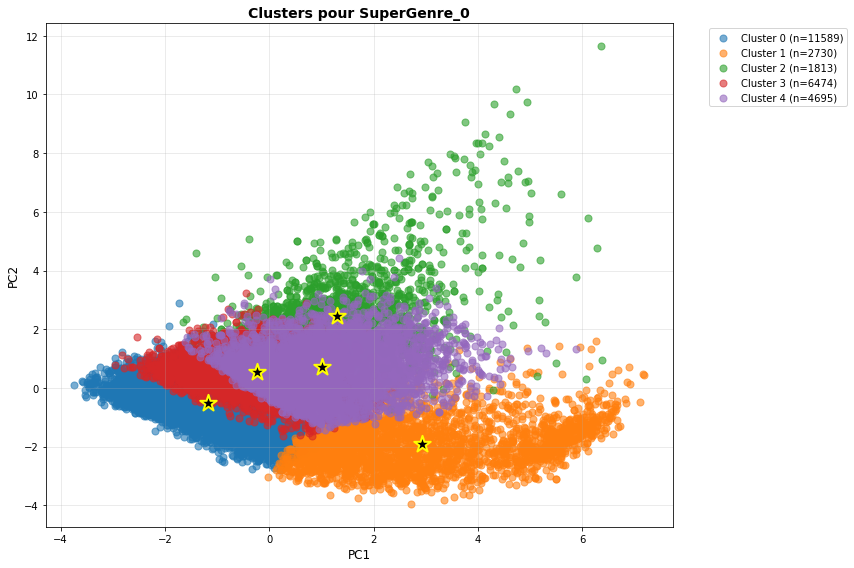


🎼 SUPER-GENRE: SuperGenre_2
   Nombre de chansons: 9681

🔹 Cluster 0: 2622 chansons
   Top genres: ['Comedy']
   Moyennes:
      energy: 0.433
      danceability: 0.597
      valence: 0.477
      acousticness: 0.815
   Exemples:
      • Prairie Dogs, Sweet Soap - Todd Barry (Comedy)
      • 36 Drinks a Week (Live) - Amy Schumer (Comedy)
      • Vacation - Comedian Bob Marley (Comedy)

🔹 Cluster 1: 3249 chansons
   Top genres: ['Comedy']
   Moyennes:
      energy: 0.837
      danceability: 0.490
      valence: 0.227
      acousticness: 0.809
   Exemples:
      • Parents of Honor Students - George Carlin (Comedy)
      • No Boobs - Whitney Cummings (Comedy)
      • Repetitively Shit Ideas - Maria Bamford (Comedy)

🔹 Cluster 2: 628 chansons
   Top genres: ['Comedy']
   Moyennes:
      energy: 0.498
      danceability: 0.578
      valence: 0.582
      acousticness: 0.538
   Exemples:
      • Masturbation - Rodney Carrington (Comedy)
      • Bob - "Weird Al" Yankovic (Comedy)
      • The C

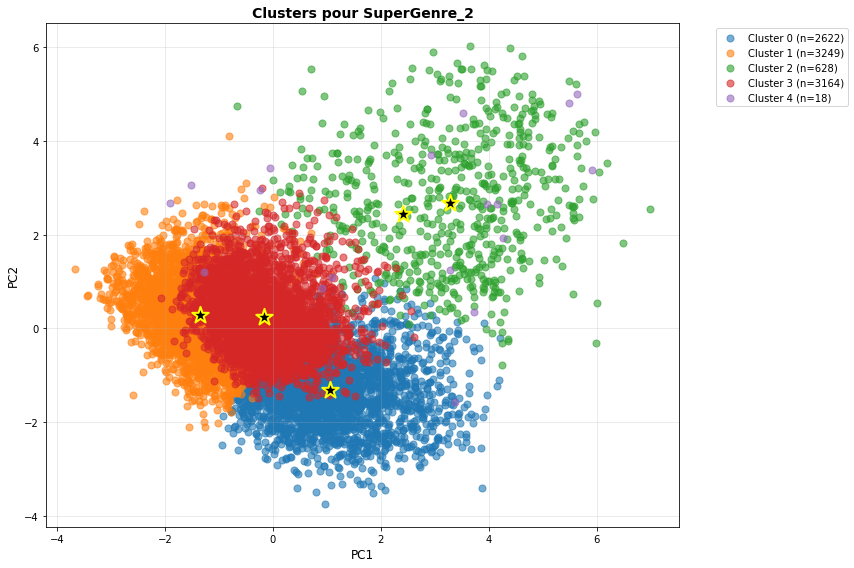


📊 CLUSTERING PAR GENRE SPÉCIFIQUE

Genres disponibles: 27
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Name: genre, dtype: int64

🎵 GENRE: Comedy
   Nombre de chansons: 9681

🔸 Sous-cluster 0: 5350 chansons
   Caractéristiques dominantes:
      instrumentalness: ↓ 65.1%
      energy: ↑ 22.4%
      valence: ↓ 19.8%
   Exemples:
      • Dad - Maria Bamford
      • Erectile Dysfunction & Dieting Tips - Remastered - Ron White
      • Businessmen - George Carlin

🔸 Sous-cluster 1: 3665 chansons
   Caractéristiques dominantes:
      instrumentalness: ↓ 65.6%
      loudness: ↑ 30.3%
      energy: ↓ 27.9%
   Exemples:
      • Take My Stomach, Please - Lisa Lampanelli
      • Boston Chicken - John Heffron
      • Surfing Lesson - Live - Bill Engvall

🔸 Sous-cluster 2: 666 chansons
   Caractér

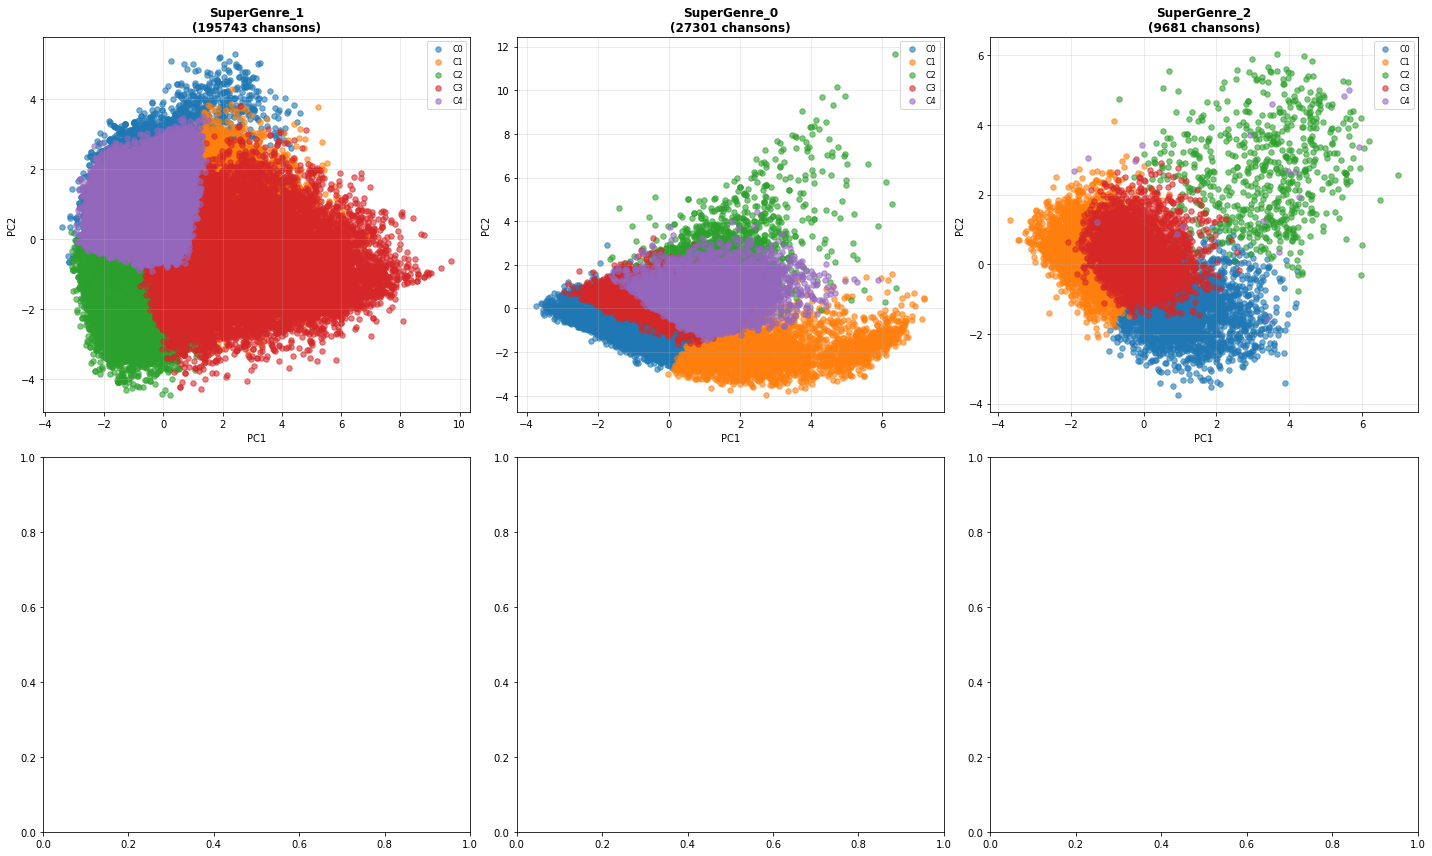


💾 SAUVEGARDE DES RÉSULTATS
✅ Sauvegardé: 232725 chansons avec clusters par genre


NameError: name 'db' is not defined

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

print("\n" + "="*60)
print("🎵 CLUSTERING PAR GENRE")
print("="*60)

# Préparer les données
features_clustering = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo']

df_clean = df[features_clustering + ['genre', 'artist_name', 'track_name', 'super_genre']].copy()
df_clean = df_clean.dropna()

# ========== FONCTION POUR FAIRE UN CLUSTERING PAR GENRE ==========
def cluster_by_genre(df, genre_name, n_clusters=3):
    """
    Fait un clustering K-Means sur les chansons d'un genre spécifique
    """
    # Filtrer par genre
    df_genre = df[df['genre'] == genre_name].copy()
    
    if len(df_genre) < n_clusters:
        print(f"⚠️ {genre_name}: Pas assez de données ({len(df_genre)} chansons)")
        return None
    
    # Préparer les features
    X = df_genre[features_clustering].values
    
    # Normaliser
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA pour visualisation
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # Ajouter les labels
    df_genre['cluster'] = labels
    df_genre['pca1'] = X_pca[:, 0]
    df_genre['pca2'] = X_pca[:, 1]
    
    # Analyser chaque cluster
    cluster_profiles = {}
    for cluster_id in range(n_clusters):
        cluster_data = df_genre[df_genre['cluster'] == cluster_id]
        means = cluster_data[features_clustering].mean()
        
        # Trouver les caractéristiques dominantes
        genre_mean = df_genre[features_clustering].mean()
        diffs = {}
        for feat in features_clustering:
            if genre_mean[feat] != 0:
                diffs[feat] = ((means[feat] - genre_mean[feat]) / genre_mean[feat]) * 100
            else:
                diffs[feat] = 0
        
        # Top 3 caractéristiques
        top_features = sorted(diffs.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
        
        cluster_profiles[cluster_id] = {
            'size': len(cluster_data),
            'means': means.to_dict(),
            'diffs': diffs,
            'top_features': top_features,
            'samples': cluster_data.sample(min(3, len(cluster_data)))[['track_name', 'artist_name']]
        }
    
    return {
        'df': df_genre,
        'profiles': cluster_profiles,
        'scaler': scaler,
        'pca': pca,
        'kmeans': kmeans,
        'n_clusters': n_clusters
    }


# ========== CLUSTERING PAR SUPER-GENRE ==========
def cluster_by_super_genre(df, super_genre_name, n_clusters=5):
    """
    Fait un clustering K-Means sur les chansons d'un super-genre spécifique
    """
    df_super = df[df['super_genre'] == super_genre_name].copy()
    
    if len(df_super) < n_clusters:
        print(f"⚠️ {super_genre_name}: Pas assez de données ({len(df_super)} chansons)")
        return None
    
    X = df_super[features_clustering].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    df_super['cluster'] = labels
    df_super['pca1'] = X_pca[:, 0]
    df_super['pca2'] = X_pca[:, 1]
    
    # Analyser chaque cluster
    cluster_profiles = {}
    for cluster_id in range(n_clusters):
        cluster_data = df_super[df_super['cluster'] == cluster_id]
        means = cluster_data[features_clustering].mean()
        
        # Genres dans ce cluster
        genre_dist = cluster_data['genre'].value_counts().head(5)
        
        cluster_profiles[cluster_id] = {
            'size': len(cluster_data),
            'means': means.to_dict(),
            'genre_distribution': genre_dist.to_dict(),
            'samples': cluster_data.sample(min(3, len(cluster_data)))[['track_name', 'artist_name', 'genre']]
        }
    
    return {
        'df': df_super,
        'profiles': cluster_profiles,
        'scaler': scaler,
        'pca': pca,
        'kmeans': kmeans,
        'n_clusters': n_clusters
    }


# ========== EXEMPLE 1: CLUSTERING PAR SUPER-GENRE ==========
print("\n" + "="*60)
print("📊 CLUSTERING PAR SUPER-GENRE")
print("="*60)

super_genres = df_clean['super_genre'].value_counts()
print(f"\nSuper-genres disponibles: {len(super_genres)}")
print(super_genres)

# Stocker les résultats
super_genre_clusters = {}

# Faire le clustering pour chaque super-genre avec assez de données
for super_genre in super_genres.index[:5]:  # Top 5 super-genres
    if super_genres[super_genre] >= 50:  # Au moins 50 chansons
        print(f"\n{'='*60}")
        print(f"🎼 SUPER-GENRE: {super_genre}")
        print(f"   Nombre de chansons: {super_genres[super_genre]}")
        print('='*60)
        
        result = cluster_by_super_genre(df_clean, super_genre, n_clusters=5)
        
        if result:
            super_genre_clusters[super_genre] = result
            
            # Afficher les clusters
            for cluster_id, profile in result['profiles'].items():
                print(f"\n🔹 Cluster {cluster_id}: {profile['size']} chansons")
                print(f"   Top genres: {list(profile['genre_distribution'].keys())[:3]}")
                
                # Caractéristiques moyennes
                print(f"   Moyennes:")
                for feat in ['energy', 'danceability', 'valence', 'acousticness']:
                    print(f"      {feat}: {profile['means'][feat]:.3f}")
                
                # Exemples
                print(f"   Exemples:")
                for _, row in profile['samples'].iterrows():
                    print(f"      • {row['track_name']} - {row['artist_name']} ({row['genre']})")
            
            # Visualisation
            plt.figure(figsize=(12, 8))
            df_plot = result['df']
            
            for cluster_id in range(result['n_clusters']):
                mask = df_plot['cluster'] == cluster_id
                plt.scatter(df_plot[mask]['pca1'], df_plot[mask]['pca2'],
                           label=f'Cluster {cluster_id} (n={mask.sum()})',
                           alpha=0.6, s=50)
            
            # Centroïdes
            centroids_pca = result['pca'].transform(result['kmeans'].cluster_centers_)
            plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                       c='black', s=300, marker='*', 
                       edgecolors='yellow', linewidth=2, zorder=10)
            
            plt.xlabel('PC1', fontsize=12)
            plt.ylabel('PC2', fontsize=12)
            plt.title(f'Clusters pour {super_genre}', fontsize=14, fontweight='bold')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.savefig(f'cluster_{super_genre.replace("/", "_")}.png', dpi=300, bbox_inches='tight')
            plt.show()


# ========== EXEMPLE 2: CLUSTERING POUR DES GENRES SPÉCIFIQUES ==========
print("\n" + "="*60)
print("📊 CLUSTERING PAR GENRE SPÉCIFIQUE")
print("="*60)

genres = df_clean['genre'].value_counts()
print(f"\nGenres disponibles: {len(genres)}")
print(genres.head(10))

# Choisir quelques genres intéressants
target_genres = genres.index[:5]  # Top 5 genres
genre_clusters = {}

for genre in target_genres:
    if genres[genre] >= 30:  # Au moins 30 chansons
        print(f"\n{'='*60}")
        print(f"🎵 GENRE: {genre}")
        print(f"   Nombre de chansons: {genres[genre]}")
        print('='*60)
        
        result = cluster_by_genre(df_clean, genre, n_clusters=3)
        
        if result:
            genre_clusters[genre] = result
            
            # Afficher les profils
            for cluster_id, profile in result['profiles'].items():
                print(f"\n🔸 Sous-cluster {cluster_id}: {profile['size']} chansons")
                print(f"   Caractéristiques dominantes:")
                for feat, diff in profile['top_features']:
                    symbol = "↑" if diff > 0 else "↓"
                    print(f"      {feat}: {symbol} {abs(diff):.1f}%")
                
                print(f"   Exemples:")
                for _, row in profile['samples'].iterrows():
                    print(f"      • {row['track_name']} - {row['artist_name']}")


# ========== EXEMPLE 3: VISUALISATION GLOBALE ==========
print("\n" + "="*60)
print("📊 VISUALISATION GLOBALE DES CLUSTERS PAR GENRE")
print("="*60)

# Créer une visualisation avec tous les super-genres
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, (super_genre, result) in enumerate(list(super_genre_clusters.items())[:6]):
    if idx < 6:
        ax = axes[idx]
        df_plot = result['df']
        
        for cluster_id in range(result['n_clusters']):
            mask = df_plot['cluster'] == cluster_id
            ax.scatter(df_plot[mask]['pca1'], df_plot[mask]['pca2'],
                      label=f'C{cluster_id}', alpha=0.6, s=30)
        
        ax.set_title(f'{super_genre}\n({len(df_plot)} chansons)', fontweight='bold')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('all_genre_clusters.png', dpi=300, bbox_inches='tight')
plt.show()


# ========== SAUVEGARDER LES RÉSULTATS ==========
print("\n" + "="*60)
print("💾 SAUVEGARDE DES RÉSULTATS")
print("="*60)

# Combiner tous les DataFrames avec clusters par genre
all_clustered = []

for super_genre, result in super_genre_clusters.items():
    df_temp = result['df'].copy()
    df_temp['super_genre_cluster'] = super_genre + '_C' + df_temp['cluster'].astype(str)
    all_clustered.append(df_temp)

if all_clustered:
    df_all_clustered = pd.concat(all_clustered, ignore_index=True)
    df_all_clustered.to_csv('spotify_clustered_by_genre.csv', index=False)
    print(f"✅ Sauvegardé: {len(df_all_clustered)} chansons avec clusters par genre")

# Mettre à jour db
db.update({
    'super_genre_clusters': super_genre_clusters,
    'genre_clusters': genre_clusters,
    'df_clustered_by_genre': df_all_clustered if all_clustered else None
})

print("\n✅ Clustering par genre terminé!")
print(f"   Super-genres analysés: {len(super_genre_clusters)}")
print(f"   Genres spécifiques analysés: {len(genre_clusters)}")

In [50]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# ========== SYSTÈME DE RECOMMANDATION AVEC CLUSTERS PAR GENRE ==========

class GenreClusterRecommender:
    """
    Système de recommandation basé sur les clusters par genre
    """
    
    def __init__(self, df_clustered, genre_clusters, super_genre_clusters):
        """
        Initialise le recommandeur
        
        Paramètres:
        -----------
        df_clustered : DataFrame avec les colonnes 'cluster', 'genre', 'super_genre'
        genre_clusters : dict des résultats de cluster_by_genre()
        super_genre_clusters : dict des résultats de cluster_by_super_genre()
        """
        self.df = df_clustered
        self.genre_clusters = genre_clusters
        self.super_genre_clusters = super_genre_clusters
        
        self.features = ['danceability', 'energy', 'loudness', 'speechiness', 
                        'acousticness', 'instrumentalness', 'liveness', 
                        'valence', 'tempo']
    
    
    def recommend_same_cluster(self, track_name, n_recommendations=5):
        """
        MÉTHODE 1: Recommander des chansons du même cluster
        
        Principe: Les chansons dans le même cluster ont des caractéristiques similaires
        """
        # Trouver la chanson
        track = self.df[self.df['track_name'] == track_name]
        
        if track.empty:
            return f"❌ Chanson '{track_name}' non trouvée"
        
        track = track.iloc[0]
        genre = track['genre']
        cluster_id = track['cluster']
        
        print(f"\n🎵 Chanson: {track_name}")
        print(f"   Artiste: {track['artist_name']}")
        print(f"   Genre: {genre}")
        print(f"   Cluster: {cluster_id}")
        
        # Trouver les chansons du même cluster
        same_cluster = self.df[
            (self.df['genre'] == genre) & 
            (self.df['cluster'] == cluster_id) &
            (self.df['track_name'] != track_name)
        ]
        
        if len(same_cluster) < n_recommendations:
            print(f"\n⚠️ Seulement {len(same_cluster)} chansons dans ce cluster")
        
        # Calculer la similarité cosinus dans le cluster
        track_features = track[self.features].values.reshape(1, -1)
        cluster_features = same_cluster[self.features].values
        
        similarities = cosine_similarity(track_features, cluster_features)[0]
        same_cluster['similarity'] = similarities
        
        # Top recommandations
        recommendations = same_cluster.nlargest(n_recommendations, 'similarity')
        
        print(f"\n✅ Top {n_recommendations} recommandations du même cluster:")
        for i, (_, row) in enumerate(recommendations.iterrows(), 1):
            print(f"   {i}. {row['track_name']} - {row['artist_name']}")
            print(f"      Similarité: {row['similarity']:.3f}")
        
        return recommendations[['track_name', 'artist_name', 'genre', 'similarity']]
    
    
 
  

# ========== UTILISATION DU SYSTÈME DE RECOMMANDATION ==========

print("\n" + "="*80)
print("🎯 SYSTÈME DE RECOMMANDATION AVEC CLUSTERS PAR GENRE")
print("="*80)

# Supposons que vous avez déjà exécuté le clustering
# et que vous avez: df_all_clustered, genre_results, super_genre_clusters

# Initialiser le recommandeur
recommender = GenreClusterRecommender(
    df_clustered=df_all_clustered,  # DataFrame avec les clusters
    genre_clusters=genre_clusters,    # Résultats de cluster_by_genre()
    super_genre_clusters={}          # Résultats de cluster_by_super_genre()
)

print("\n✅ Recommandeur initialisé!")
print(f"   Nombre de chansons: {len(df_all_clustered)}")
print(f"   Genres disponibles: {df_all_clustered['genre'].nunique()}")

# ========== EXEMPLE D'UTILISATION ==========

# Choisir une chanson exemple
example_track = df_all_clustered['track_name'].iloc[0]
print(f"\n📀 Chanson exemple: {example_track}")

print("\n" + "="*80)
print("MÉTHODE 1: Recommandations du même cluster")
print("="*80)
recs_1 = recommender.recommend_same_cluster(example_track, n_recommendations=5)









🎯 SYSTÈME DE RECOMMANDATION AVEC CLUSTERS PAR GENRE

✅ Recommandeur initialisé!
   Nombre de chansons: 232725
   Genres disponibles: 27

📀 Chanson exemple: C'est beau de faire un Show

MÉTHODE 1: Recommandations du même cluster

🎵 Chanson: C'est beau de faire un Show
   Artiste: Henri Salvador
   Genre: Movie
   Cluster: 2

✅ Top 5 recommandations du même cluster:
   1. Hou la menteuse ! - Live - Dorothée
      Similarité: 1.000
   2. A L'Ordinaire - Maïdi Roth
      Similarité: 1.000
   3. Dita - Lorie
      Similarité: 1.000
   4. Pour jouer du Rock’n’Roll - Live - Dorothée
      Similarité: 1.000
   5. Détective privé - Live - Dorothée
      Similarité: 1.000


C:\Users\MSI\AppData\Local\Temp\ipykernel_9464\245945997.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_cluster['similarity'] = similarities
